In [330]:
%ls ../experiments/

__flores_mrr_results/  _nusax_mrr_results/
_flores_mrr_results/   same-sentence-all-vs-all-first/
__ntrex_mrr_results/   same-sentence-all-vs-all-fixedseed/
_ntrex_mrr_results/


In [331]:
from pathlib import Path

In [339]:
corpora = ["nusax", "flores", "ntrex"]

In [340]:
results_paths = {
    c: Path("../experiments") / f"_{c}_mrr_results" / f"{c}_mrr_results.tsv"
    for c in corpora
}

In [363]:
results_paths

{'nusax': PosixPath('../experiments/_nusax_mrr_results/nusax_mrr_results.tsv'),
 'flores': PosixPath('../experiments/_flores_mrr_results/flores_mrr_results.tsv'),
 'ntrex': PosixPath('../experiments/_ntrex_mrr_results/ntrex_mrr_results.tsv')}

In [364]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import rankdata

In [365]:
results_dfs = {
    c: pd.read_csv(p, sep="\t") for c, p in results_paths.items()
}

In [366]:
df_results_combined = pd.concat(results_dfs.values(), ignore_index=True).set_index(["dataset", "model",])

In [373]:
df_results_combined.groupby(['dataset', 'model', 'query_lang']).mrr.var().loc['flores'].unstack().T

model          mbert  mbert_cls  mbert_stsb      xlmr  xlmr_cls  xlmr_stsb
query_lang                                                                
afr         0.000002   0.000001    0.000002  0.000001  0.000002   0.000002
amh         0.000001   0.000002    0.000002  0.000002  0.000002   0.000002
arb         0.000003   0.000002    0.000002  0.000002  0.000002   0.000002
bak         0.000002   0.000002    0.000003  0.000002  0.000002   0.000002
bel         0.000002   0.000002    0.000002  0.000002  0.000002   0.000003
...              ...        ...         ...       ...       ...        ...
xho         0.000002   0.000002    0.000002  0.000002  0.000002   0.000002
yor         0.000001   0.000001    0.000002  0.000002  0.000002   0.000002
yue         0.000003   0.000002    0.000002  0.000002  0.000002   0.000003
zho         0.000003   0.000002    0.000002  0.000002  0.000002   0.000003
zul         0.000002   0.000002    0.000001  0.000001  0.000001   0.000002

[98 rows x 6 columns]

In [374]:
df_results_combined.groupby(['dataset', 'model', 'query_lang']).mrr.var().loc['ntrex'].unstack().T

model              mbert     mbert_cls    mbert_stsb          xlmr  \
query_lang                                                           
afr         4.844885e-07  5.602005e-07  4.227922e-07  5.216329e-07   
amh         3.778590e-07  4.391443e-07  4.076765e-07  4.532457e-07   
arb         3.651819e-07  4.390399e-07  4.041718e-07  4.392493e-07   
bak         4.164115e-07  3.492006e-07  3.625275e-07  4.290779e-07   
bel         4.561455e-07  3.971766e-07  4.148627e-07  3.453958e-07   
...                  ...           ...           ...           ...   
xho         5.381322e-07  4.092337e-07  3.556037e-07  4.105723e-07   
yor         6.428120e-07  4.033472e-07  3.308244e-07  4.432156e-07   
yue         4.745111e-07  3.516931e-07  3.938313e-07  4.584704e-07   
zho         6.682991e-07  4.192318e-07  5.047669e-07  6.004749e-07   
zul         3.223454e-07  4.699148e-07  4.276219e-07  5.408750e-07   

model           xlmr_cls     xlmr_stsb  
query_lang                              
afr         6.597938e-07  4.813563e-07  
amh         4.232505e-07  5.678767e-07  
arb         4.510213e-07  6.189897e-07  
bak         5.085896e-07  5.309273e-07  
bel         4.996914e-07  5.755753e-07  
...                  ...           ...  
xho         4.980743e-07  4.301744e-07  
yor         4.386564e-07  6.219126e-07  
yue         5.848484e-07  4.794048e-07  
zho         4.075084e-07  8.233022e-07  
zul         6.521402e-07  5.476864e-07  

[98 rows x 6 columns]

In [380]:
df_results_combined.groupby(['dataset', 'model', 'query_lang']).mrr.mean().loc['nusax'].unstack().T

model           mbert  mbert_cls  mbert_stsb      xlmr  xlmr_cls  xlmr_stsb
query_lang                                                                 
acehnese     0.007572   0.007570    0.007038  0.007315  0.008022   0.007738
balinese     0.007517   0.006970    0.007547  0.007500  0.007338   0.006954
banjarese    0.007175   0.007012    0.007294  0.007127  0.007275   0.007680
buginese     0.006887   0.007159    0.007073  0.007619  0.007402   0.006843
english      0.007094   0.007464    0.007879  0.007353  0.007456   0.007017
indonesian   0.007651   0.006900    0.007145  0.007504  0.007620   0.008234
javanese     0.007701   0.006809    0.007761  0.007507  0.007466   0.007470
madurese     0.007328   0.007047    0.007568  0.007331  0.007205   0.006715
minangkabau  0.006789   0.008025    0.007792  0.007409  0.007750   0.007647
ngaju        0.006800   0.007590    0.007671  0.007304  0.007485   0.007590
sundanese    0.007557   0.006969    0.006990  0.007622  0.007387   0.007335
toba_batak   0.006885   0.007160    0.007506  0.008169  0.007342   0.007197

# load featurized

In [420]:
# LOAD FLORES & NTREX
flores_separate_langs = ds.load_from_disk("../data-bin/flores-dev-no-orth/")
ntrex_separate_langs = ds.load_from_disk("../data-bin/ntrex-no-orth//")

flores_separate_langs = flores_separate_langs.map(add_sentence_id, batched=True, batch_size=10000)
ntrex_separate_langs = ntrex_separate_langs.map(add_sentence_id, batched=True, batch_size=10000)

flores = ds.concatenate_datasets([
    flores_separate_langs[lang] for lang in flores_separate_langs
])
ntrex = ds.concatenate_datasets([
    ntrex_separate_langs[lang] for lang in ntrex_separate_langs if lang in flores_separate_langs
])

# LOAD NUSAX
nusax_paths = {
    split: Path("../data/nusax_parallel_sentences") / f"{split}.csv"
    for split in ["train", "valid", "test"]
}
nusax_dataset_dict = ds.DatasetDict()
for split, p in nusax_paths.items():
    _split = {"dev": "valid"}.get(split, split)    
    _ds = ds.Dataset.from_csv(str(p)).remove_columns('Unnamed: 0')
    nusax_dataset_dict[_split] = _ds

nusax = ds.concatenate_datasets([nusax_dataset_dict[split] for split in nusax_dataset_dict])
nusax_df = nusax.to_pandas()
nusax_df.columns.name = "language"
nusax_sentences = nusax_df.stack()
nusax_sentences.index.names = ['sentence_id', 'language']
nusax_sentences.name = 'text' 
nusax_df = nusax_sentences.reset_index().sample(frac=1) # randomize order
nusax = ds.Dataset.from_pandas(nusax_df, preserve_index=False)

# Combine datasets
all_datasets = {"flores": flores, "nusax": nusax, "ntrex": ntrex}
all_dataset_dfs = {
    key: val.to_pandas() for key, val in all_datasets.items()
}
for dataset_name, df in all_dataset_dfs.items():
    df['global_sentence_id'] = df.index.tolist()

print("ranking")

# DO ACTUAL RANKING
model_names = { "mbert", "xlmr", "mbert_cls", "xlmr_cls", "mbert_stsb", "xlmr_stsb" }

# load pickle file
with open('../data/retrieval_featurized_sentences_flores_nusax_ntrex.pkl', 'rb') as f:
    featurized_sentences = pickle.load(f)

Loading cached processed dataset at /home/jonne/ling-inf-transfer/data-bin/flores-dev-no-orth/arz/cache-43115bc207b20d5c.arrow
Loading cached processed dataset at /home/jonne/ling-inf-transfer/data-bin/flores-dev-no-orth/aeb/cache-982337e36dafebae.arrow
Loading cached processed dataset at /home/jonne/ling-inf-transfer/data-bin/flores-dev-no-orth/cat/cache-4a3feff7fa0a245e.arrow
Loading cached processed dataset at /home/jonne/ling-inf-transfer/data-bin/flores-dev-no-orth/gla/cache-89b272c387eb6ccc.arrow
Loading cached processed dataset at /home/jonne/ling-inf-transfer/data-bin/flores-dev-no-orth/snd/cache-24ae51fa8ad28e53.arrow
Loading cached processed dataset at /home/jonne/ling-inf-transfer/data-bin/flores-dev-no-orth/taq/cache-481a447eba018252.arrow
Loading cached processed dataset at /home/jonne/ling-inf-transfer/data-bin/flores-dev-no-orth/ell/cache-fc1703be8c1296cf.arrow
Loading cached processed dataset at /home/jonne/ling-inf-transfer/data-bin/flores-dev-no-orth/jav/cache-954480b

Loading cached processed dataset at /home/jonne/ling-inf-transfer/data-bin/flores-dev-no-orth/mya/cache-28f29165a13521e9.arrow
Loading cached processed dataset at /home/jonne/ling-inf-transfer/data-bin/flores-dev-no-orth/tum/cache-3bc25c511e3795a0.arrow
Loading cached processed dataset at /home/jonne/ling-inf-transfer/data-bin/flores-dev-no-orth/ilo/cache-71c776a6fa9488de.arrow
Loading cached processed dataset at /home/jonne/ling-inf-transfer/data-bin/flores-dev-no-orth/slk/cache-50eaa13965a7b950.arrow
Loading cached processed dataset at /home/jonne/ling-inf-transfer/data-bin/flores-dev-no-orth/por/cache-d94eb791a3b7df98.arrow
Loading cached processed dataset at /home/jonne/ling-inf-transfer/data-bin/flores-dev-no-orth/crh/cache-0aa08016ea30ba7a.arrow
Loading cached processed dataset at /home/jonne/ling-inf-transfer/data-bin/flores-dev-no-orth/srp/cache-ae20c7c1bc5964ae.arrow
Loading cached processed dataset at /home/jonne/ling-inf-transfer/data-bin/flores-dev-no-orth/lus/cache-6c2bd61

Loading cached processed dataset at /home/jonne/ling-inf-transfer/data-bin/flores-dev-no-orth/deu/cache-68075a1f03ba5b3f.arrow
Loading cached processed dataset at /home/jonne/ling-inf-transfer/data-bin/flores-dev-no-orth/ben/cache-4b73271a95c815b3.arrow
Loading cached processed dataset at /home/jonne/ling-inf-transfer/data-bin/flores-dev-no-orth/yue/cache-acb32104d3909785.arrow
Loading cached processed dataset at /home/jonne/ling-inf-transfer/data-bin/flores-dev-no-orth/jpn/cache-223640baf3fde7c2.arrow
Loading cached processed dataset at /home/jonne/ling-inf-transfer/data-bin/flores-dev-no-orth/rus/cache-b1a6079ae63ad0f1.arrow
Loading cached processed dataset at /home/jonne/ling-inf-transfer/data-bin/flores-dev-no-orth/hau/cache-6d9de6c8e3433133.arrow
Loading cached processed dataset at /home/jonne/ling-inf-transfer/data-bin/flores-dev-no-orth/lmo/cache-6d6a879d52dba4fc.arrow
Loading cached processed dataset at /home/jonne/ling-inf-transfer/data-bin/flores-dev-no-orth/zsm/cache-c68b6f8

Loading cached processed dataset at /home/jonne/ling-inf-transfer/data-bin/flores-dev-no-orth/acm/cache-a4a6e72b9e32e2d3.arrow
Loading cached processed dataset at /home/jonne/ling-inf-transfer/data-bin/ntrex-no-orth/hun/cache-808af18109c223af.arrow
Loading cached processed dataset at /home/jonne/ling-inf-transfer/data-bin/ntrex-no-orth/tah/cache-7cb227b7c28d2816.arrow
Loading cached processed dataset at /home/jonne/ling-inf-transfer/data-bin/ntrex-no-orth/div/cache-a8ad24f4b8f0f1b3.arrow
Loading cached processed dataset at /home/jonne/ling-inf-transfer/data-bin/ntrex-no-orth/ssw/cache-003861495469e329.arrow
Loading cached processed dataset at /home/jonne/ling-inf-transfer/data-bin/ntrex-no-orth/est/cache-e374aa4c3efb6895.arrow
Loading cached processed dataset at /home/jonne/ling-inf-transfer/data-bin/ntrex-no-orth/fuc/cache-a9b1197737bf6974.arrow
Loading cached processed dataset at /home/jonne/ling-inf-transfer/data-bin/ntrex-no-orth/slk/cache-52041a20b5fe1a6e.arrow
Loading cached proc

Loading cached processed dataset at /home/jonne/ling-inf-transfer/data-bin/ntrex-no-orth/snd/cache-f4854e56bf574668.arrow
Loading cached processed dataset at /home/jonne/ling-inf-transfer/data-bin/ntrex-no-orth/hin/cache-3c8bbc7045322b6d.arrow
Loading cached processed dataset at /home/jonne/ling-inf-transfer/data-bin/ntrex-no-orth/slv/cache-6e2dd08a0ec547ee.arrow
Loading cached processed dataset at /home/jonne/ling-inf-transfer/data-bin/ntrex-no-orth/hrv/cache-0123598a794eb874.arrow
Loading cached processed dataset at /home/jonne/ling-inf-transfer/data-bin/ntrex-no-orth/ltz/cache-4ead0f6baaec9ab0.arrow
Loading cached processed dataset at /home/jonne/ling-inf-transfer/data-bin/ntrex-no-orth/shi/cache-d2e038fb5338c814.arrow
Loading cached processed dataset at /home/jonne/ling-inf-transfer/data-bin/ntrex-no-orth/arb/cache-8f7d919f31d84794.arrow
Loading cached processed dataset at /home/jonne/ling-inf-transfer/data-bin/ntrex-no-orth/tat/cache-18e6a802ac1c9de6.arrow
Loading cached processed

ranking


In [425]:
flores_df = all_dataset_dfs['flores']

In [426]:
flores_df

text language  \
0       في يوم الاتنين، علماء من كلية الطب بجامعة ستان...      arz   
1       الباحثين الرئيسيين بيقولوا أن ده ممكن يكشف عن ...      arz   
2       طيارة جاس-39غربين اتحطمت على مدرج الساعة 9:30 ...      arz   
3       تم الإشارة للطيار على أنه قائد السرب ديلوكريت ...      arz   
4       وسائل الإعلام المحلية قالت أن فيه عربية مطافي ...      arz   
...                                                   ...      ...   
195407  يوصل موسم السياحة بمحطات التلال ذروته عامةً خل...      acm   
195408  مع ذلك، يتمتعون بنوع مختلف من الجمال والسحر خل...      acm   
195409  عدد قليل فقط من شركات الطيران بعدها تقدم أسعار...      acm   
195410  من الخطوط الجوية اللي توفر هالشي هي طيران كندا...      acm   
195411  بكل الأحوال، لازم تحجز بالتليفون مباشرة ويه شر...      acm   

        sentence_id  global_sentence_id  
0                 0                   0  
1                 1                   1  
2                 2                   2  
3                 3                   3  
4                 4                   4  
...             ...                 ...  
195407          992              195407  
195408          993              195408  
195409          994              195409  
195410          995              195410  
195411          996              195411  

[195412 rows x 4 columns]

In [423]:
featurized_sentences['flores']['mbert']

array([[-0.18831596,  0.04112378,  0.56899375, ...,  0.52385944,
         0.47420803, -0.12315504],
       [ 0.03560729, -0.47129154,  0.7882964 , ...,  0.40112495,
         0.3663852 ,  0.02343829],
       [-0.38252208, -0.40073133,  0.6794899 , ...,  0.63530505,
         0.46011382, -0.22855845],
       ...,
       [-0.33253452, -0.14204177,  0.9709062 , ...,  0.5324359 ,
         0.26630732,  0.2651635 ],
       [-0.46683356, -0.22615097,  1.1067499 , ...,  0.24152522,
         0.2765964 , -0.05997559],
       [-0.32758453, -0.3031974 ,  1.013498  , ...,  0.48119   ,
        -0.17754166,  0.18256901]], dtype=float32)

In [428]:
def get_lang_dfs(lang, lang2, embs, df):
    lang_dfs = {lang: df[df.language == lang].copy().reset_index(drop=True) for lang in (lang, lang2)}    
    return lang_dfs

In [433]:
# !pip install string2string

Let's inspect the MRRs manually; do they make sense?

In [432]:
flores_mbert_fin = get_lang_dfs('fin', 'est', featurized_sentences['flores']['mbert'], flores_df)['fin']
flores_mbert_est = get_lang_dfs('fin', 'est', featurized_sentences['flores']['mbert'], flores_df)['est']

In [441]:
from sklearn.metrics.pairwise import pairwise_distances

In [467]:
def plot_hist_for_pair(lang1, lang2, corpus_name='flores', model_name='mbert'):
    embs = featurized_sentences[corpus_name][model_name]
    df = all_dataset_dfs[corpus_name]
    
    lang_dfs = get_lang_dfs(lang1, lang2, embs, df)
    lang1_df = lang_dfs[lang1]
    lang2_df = lang_dfs[lang2]
    
    _a = embs[lang1_df.global_sentence_id]
    _b = embs[lang2_df.global_sentence_id]
    _c = pairwise_distances(_a, _b)
    
    s = pd.Series(_c.diagonal()).plot(color='darkred', alpha=0.5, kind='hist')
    
    return _c

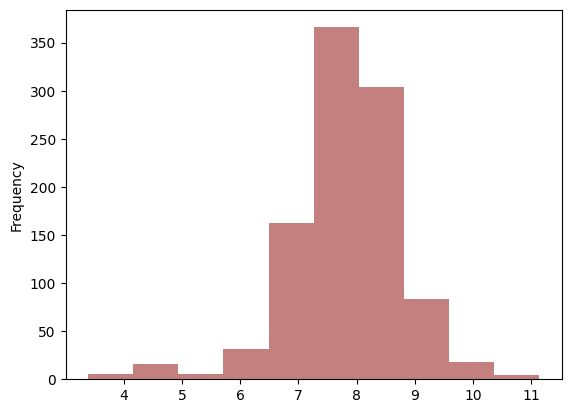

In [475]:
fin_est_dists = plot_hist_for_pair('fin', 'est')

In [526]:
A = np.random.randn(3,3)

In [527]:
A

array([[-0.71744136,  0.13789342, -0.79528897],
       [-0.39333438, -0.78370239,  0.5038064 ],
       [ 0.55398979,  0.96922203, -1.78038392]])

In [530]:
rankdata(A, axis=1)

array([[2., 3., 1.],
       [2., 1., 3.],
       [2., 3., 1.]])

# Fixed average rank calculation

In [576]:
def all_ranks_dists_lang_vs_lang2_pairwise(lang, lang2, embs, df):
    assert embs.shape[0] == df.shape[0]

    # Filter DataFrames by language only once and store them in a dictionary
    lang_dfs = {lang: df[df.language == lang].copy().reset_index(drop=True) for lang in (lang, lang2)}

    embs_lang = embs[lang_dfs[lang].global_sentence_id]
    embs_lang2 = embs[lang_dfs[lang2].global_sentence_id]

    # Use pairwise_distances_chunked to compute pairwise distances in smaller chunks
    distances_iter = pairwise_distances_chunked(embs_lang, embs_lang2, metric="cosine")

    mrr_sum = 0
    count = 0
    all_ranks = []
    all_distances = []
    for distances_chunk in distances_iter:
        # Compute ranks using rankdata from scipy.stats
        ranks = rankdata(distances_chunk, axis=1)
        all_ranks.append(ranks)
        all_distances.append(distances_chunk)

    if len(all_ranks) == 1:
        all_ranks = all_ranks[0]
    if len(all_distances) == 1:
        all_distances = all_distances[0]
        
    return all_ranks, all_distances

In [577]:
hist_kwargs = {
    "kind": 'hist',
    "alpha": 0.5,
    "color": "darkred"
}

In [677]:
def sim_search_results(lang1, lang2, corpus_name='flores', model_name='mbert', mrr=True):
    embs = featurized_sentences[corpus_name][model_name]
    df = all_dataset_dfs[corpus_name]
    
    _ranks, _ = all_ranks_dists_lang_vs_lang2_pairwise(lang1, lang2, embs, df)
    ranks_that_matter = pd.Series(_ranks.diagonal())
    
    out = {
        'avg_rank' : ranks_that_matter.mean(),
        'std_rank': ranks_that_matter.std(),
        'mrr': ranks_that_matter.apply(lambda x: 1/x).mean()
    }
    
    return out

In [653]:
import itertools as it

In [654]:
flores_ntrex_langs = set(all_dataset_dfs['flores'].language) & set(all_dataset_dfs['ntrex'].language)
flores_ntrex_lang_pairs = list(it.product(flores_ntrex_langs, flores_ntrex_langs))

In [660]:
small_ntrex_langs = ['fin', 'swe', 'eng', 'heb', 'rus']
small_ntrex_lang_pairs = list(it.product(flores_ntrex_langs, flores_ntrex_langs))

In [661]:
nusax_langs = set(all_dataset_dfs['nusax'].language)
nusax_lang_pairs = list(it.product(nusax_langs, nusax_langs))

In [674]:
def get_all_pairs_sim_search(pairs, **kwargs):
    results = []

    for lang1, lang2 in tqdm(
        pairs, 
        desc="Ranking results...", 
        total=len(pairs)
    ):
        _d = sim_search_results(lang1, lang2, **kwargs)
        _d['lang1'] = lang1
        _d['lang2'] = lang2

        results.append(_d)
    
    return pd.DataFrame(results)

In [679]:
model_names

{'mbert', 'mbert_cls', 'mbert_stsb', 'xlmr', 'xlmr_cls', 'xlmr_stsb'}

In [680]:
nusax_results = {}
for model_name in model_names:
    print(model_name)
    nusax_results[model_name] = get_all_pairs_sim_search(
        nusax_lang_pairs, corpus_name='nusax', model_name=model_name)

mbert_cls


Ranking results...: 100%|███████████████████████████████████████████████████████| 144/144 [00:15<00:00,  9.19it/s]


xlmr_cls


Ranking results...: 100%|███████████████████████████████████████████████████████| 144/144 [00:15<00:00,  9.14it/s]


xlmr


Ranking results...: 100%|███████████████████████████████████████████████████████| 144/144 [00:15<00:00,  9.16it/s]


xlmr_stsb


Ranking results...: 100%|███████████████████████████████████████████████████████| 144/144 [00:15<00:00,  9.15it/s]


mbert_stsb


Ranking results...: 100%|███████████████████████████████████████████████████████| 144/144 [00:15<00:00,  9.14it/s]


mbert


Ranking results...: 100%|███████████████████████████████████████████████████████| 144/144 [00:15<00:00,  9.12it/s]


In [689]:
nusax_results_all = pd.concat((df.assign(model=k) for k, df in nusax_results.items()), ignore_index=True)

In [692]:
nusax_results_all = nusax_results_all[nusax_results_all.lang1 != nusax_results_all.lang2]

<Axes: xlabel='lang2', ylabel='lang1'>

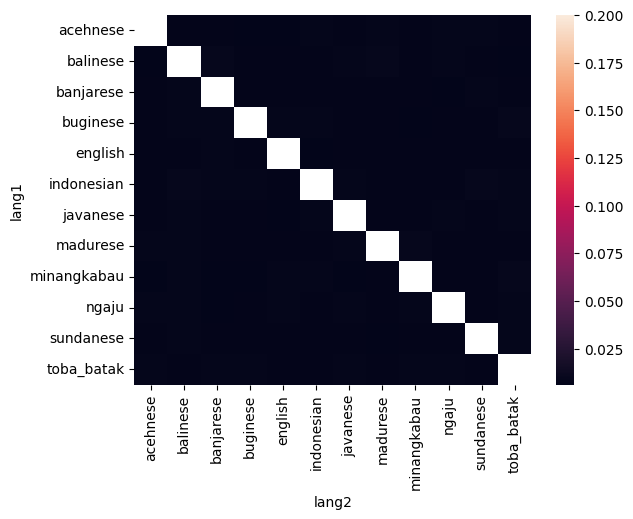

In [725]:
sns.heatmap(nusax_results_all.groupby(['lang1', 'lang2']).mrr.mean().unstack(), vmax=0.2, )

<Axes: xlabel='lang2', ylabel='lang1'>

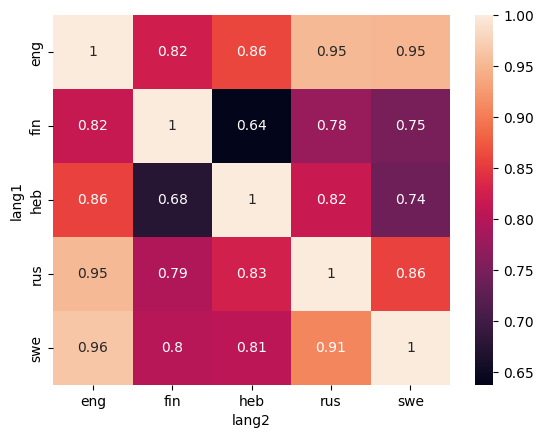

In [659]:
sns.heatmap(_res.set_index(['lang1', 'lang2']).mrr.unstack(), annot=True)

# OK lets use the outputs of `mrr.py`

In [709]:
nusax_retrieval_results = pd.read_csv("../experiments/nusax_retrieval_results.tsv", sep="\t")

In [714]:
nusax_retrieval_results = nusax_retrieval_results[nusax_retrieval_results.lang1 != nusax_retrieval_results.lang2].copy()

In [730]:
flores_retrieval_results = pd.read_csv("../experiments/flores_retrieval_results.tsv", sep="\t")

In [738]:
import matplotlib.pyplot as plt

In [743]:
mbert_langs = [
    "Afrikaans", "Albanian", "Arabic", 
    "Aragonese", "Armenian", "Asturian", 
    "Azerbaijani", "Bashkir", "Basque", 
    "Bavarian", "Belarusian", "Bengali", 
    "Bishnupriya Manipuri", "Bosnian", "Breton", 
    "Bulgarian", "Burmese","Myanmar", "Catalan", "Cebuano", 
    "Chechen", "Chinese (Simplified)", "Chinese (Traditional)", "Chinese",
    "Chuvash", "Croatian", "Czech", "Danish", "Dutch", "English", 
    "Estonian", "Finnish", "French", "Galician", "Georgian", "German", 
    "Greek", "Gujarati", "Haitian", "Hebrew", "Hindi", "Hungarian", 
    "Icelandic", "Ido", "Indonesian", "Irish", "Italian", "Japanese", 
    "Javanese", "Kannada", "Kazakh", "Kirghiz","Kyrgyz", "Korean", "Latin", 
    "Latvian", "Lithuanian", "Lombard", "Low Saxon", "Luxembourgish", 
    "Macedonian", "Malagasy", "Malay", "Malayalam", "Marathi", 
    "Minangkabau", "Nepali", "Newar", "Norwegian Bokmål", 
    "Norwegian Nynorsk", "Occitan", "Persian (Farsi)", "Farsi", "Persian",
    "Piedmontese", "Polish", "Portuguese", "Punjabi", "Panjabi","Romanian", 
    "Russian", "Scots", "Serbian", "Serbo-Croatian", "Sicilian", 
    "Slovak", "Slovenian", "South Azerbaijani", "Spanish", "Sundanese", 
    "Swahili", "Swedish", "Tagalog", "Tajik", "Tamil", "Tatar", 
    "Telugu", "Turkish", "Ukrainian", "Urdu", "Uzbek", 
    "Vietnamese", "Volapük", "Waray-Waray", 
    "Welsh", "West Frisian", "Western Punjabi", "Yoruba"
]

In [744]:
languages_path = "../data/ntrex/LANGUAGES_tab.tsv"

In [745]:
def invert_dict(d):
    return {v: k for k,v in d.items()}

In [747]:
import re

In [748]:
lang_to_human_readable_language = pd.read_csv(
    languages_path, sep="\t", 
    header=None, names=["language_code", "language"]
).set_index('language_code').language.to_dict()

temporary = {}
for lang, long_lang in lang_to_human_readable_language.items():
    lang_no_orth = lang.split("-")[0]
    long_lang_no_orth = re.sub(pattern="\(.*\)", repl="", string=long_lang).strip()
    if lang_no_orth not in lang_to_human_readable_language:
        temporary[lang_no_orth] = long_lang_no_orth
        
lang_to_human_readable_language.update(temporary)

human_readable_language_to_lang = invert_dict(lang_to_human_readable_language)

In [753]:
flores_retrieval_results['lang1_human_readable'] = flores_retrieval_results['lang1'].apply(lambda l: lang_to_human_readable_language[l])

In [754]:
flores_retrieval_results['lang2_human_readable'] = flores_retrieval_results['lang2'].apply(lambda l: lang_to_human_readable_language[l])

In [817]:
ordered_languages = [l for l, i in sorted(flores_retrieval_results.lang1_human_readable\
       .apply(lambda l: (l, int(l not in mbert_langs))).unique(), key=lambda t: (t[-1], t[0]))]

In [818]:
ordered_language_codes = [human_readable_language_to_lang[ol] for ol in ordered_languages]

In [819]:
flores_retrieval_results['lang1'] = pd.Categorical(values=flores_retrieval_results['lang1'], categories=ordered_language_codes, ordered=True)
flores_retrieval_results['lang2'] = pd.Categorical(values=flores_retrieval_results['lang2'], categories=ordered_language_codes, ordered=True)

In [820]:
from matplotlib.colors import BoundaryNorm

<Axes: >

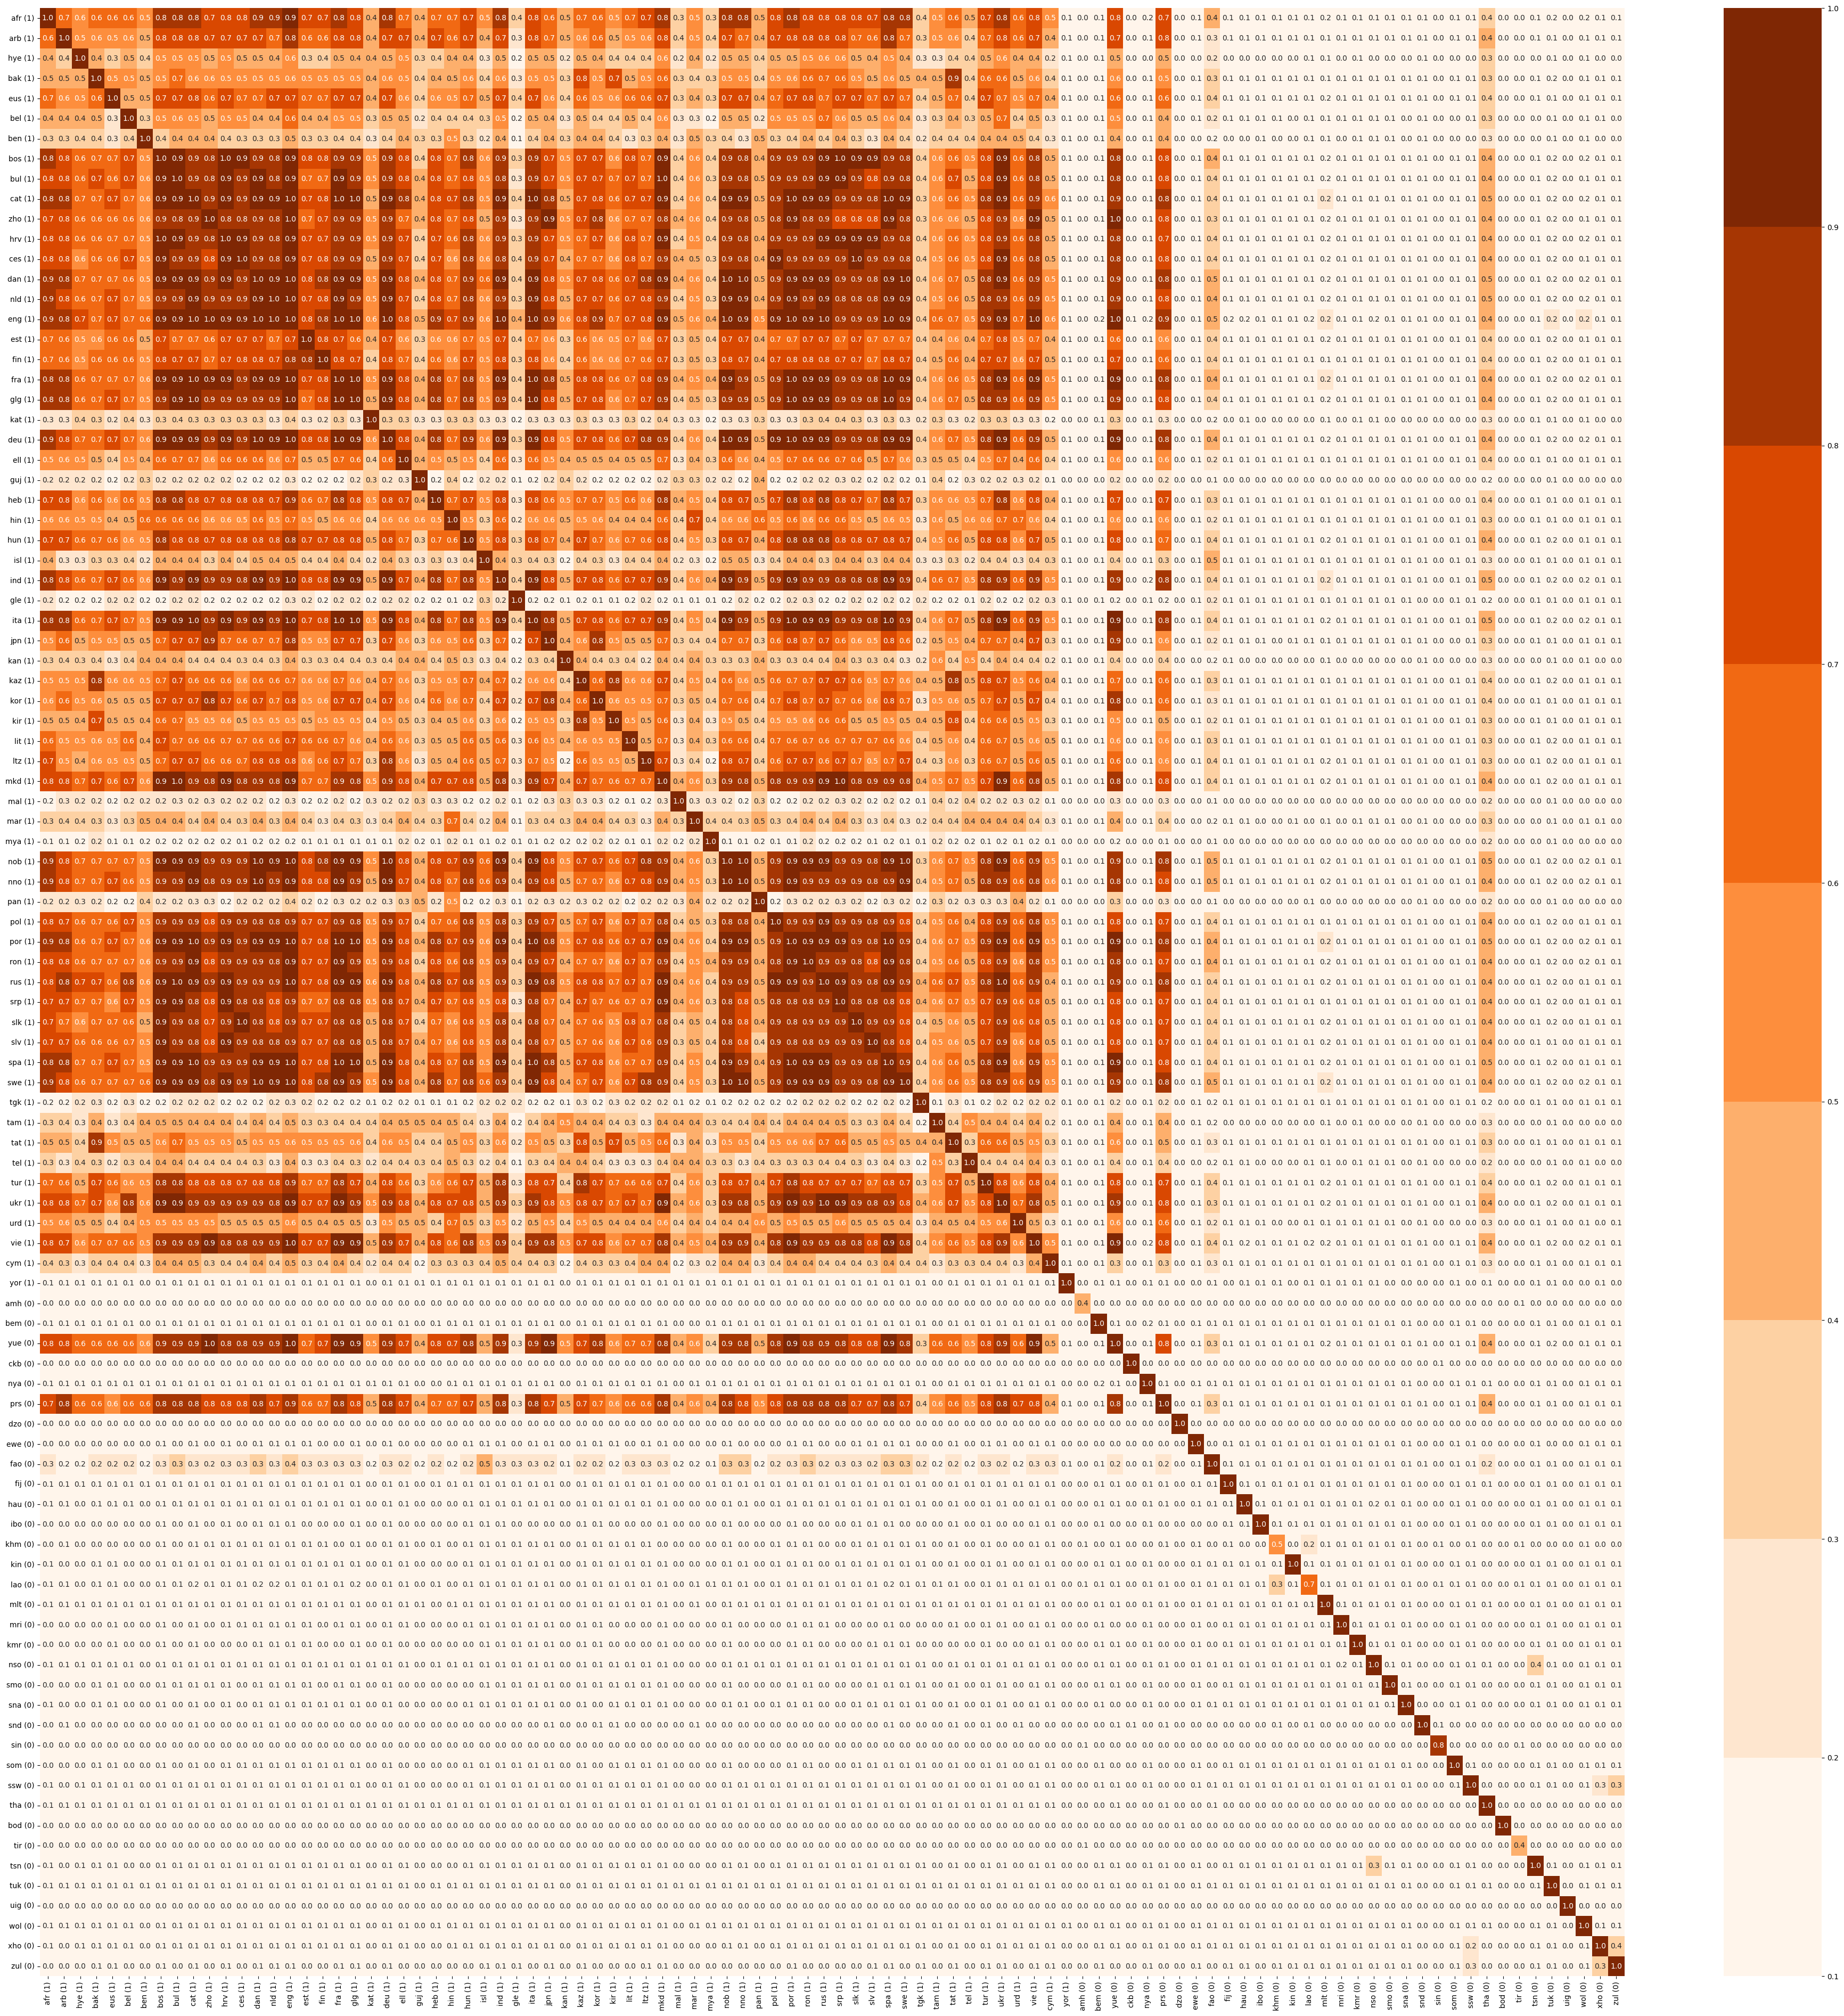

In [821]:
__df = flores_retrieval_results.set_index([
    "model", "lang1", "lang2"
]).mrr.unstack().loc['mbert']

__df.index = [f"{l} ({int(lang_to_human_readable_language[l] in mbert_langs)})" for l in ordered_language_codes]
__df.columns = [f"{l} ({int(lang_to_human_readable_language[l] in mbert_langs)})" for l in ordered_language_codes]

bounds = np.arange(1, 11)/10
norm = BoundaryNorm(boundaries=bounds, ncolors=256)

heatmap_fig, heatmap_ax = plt.subplots(figsize=(48, 48))
sns.heatmap(__df, ax=heatmap_ax, annot=True, fmt=".1f", norm=norm,cmap='Oranges')

<Axes: >

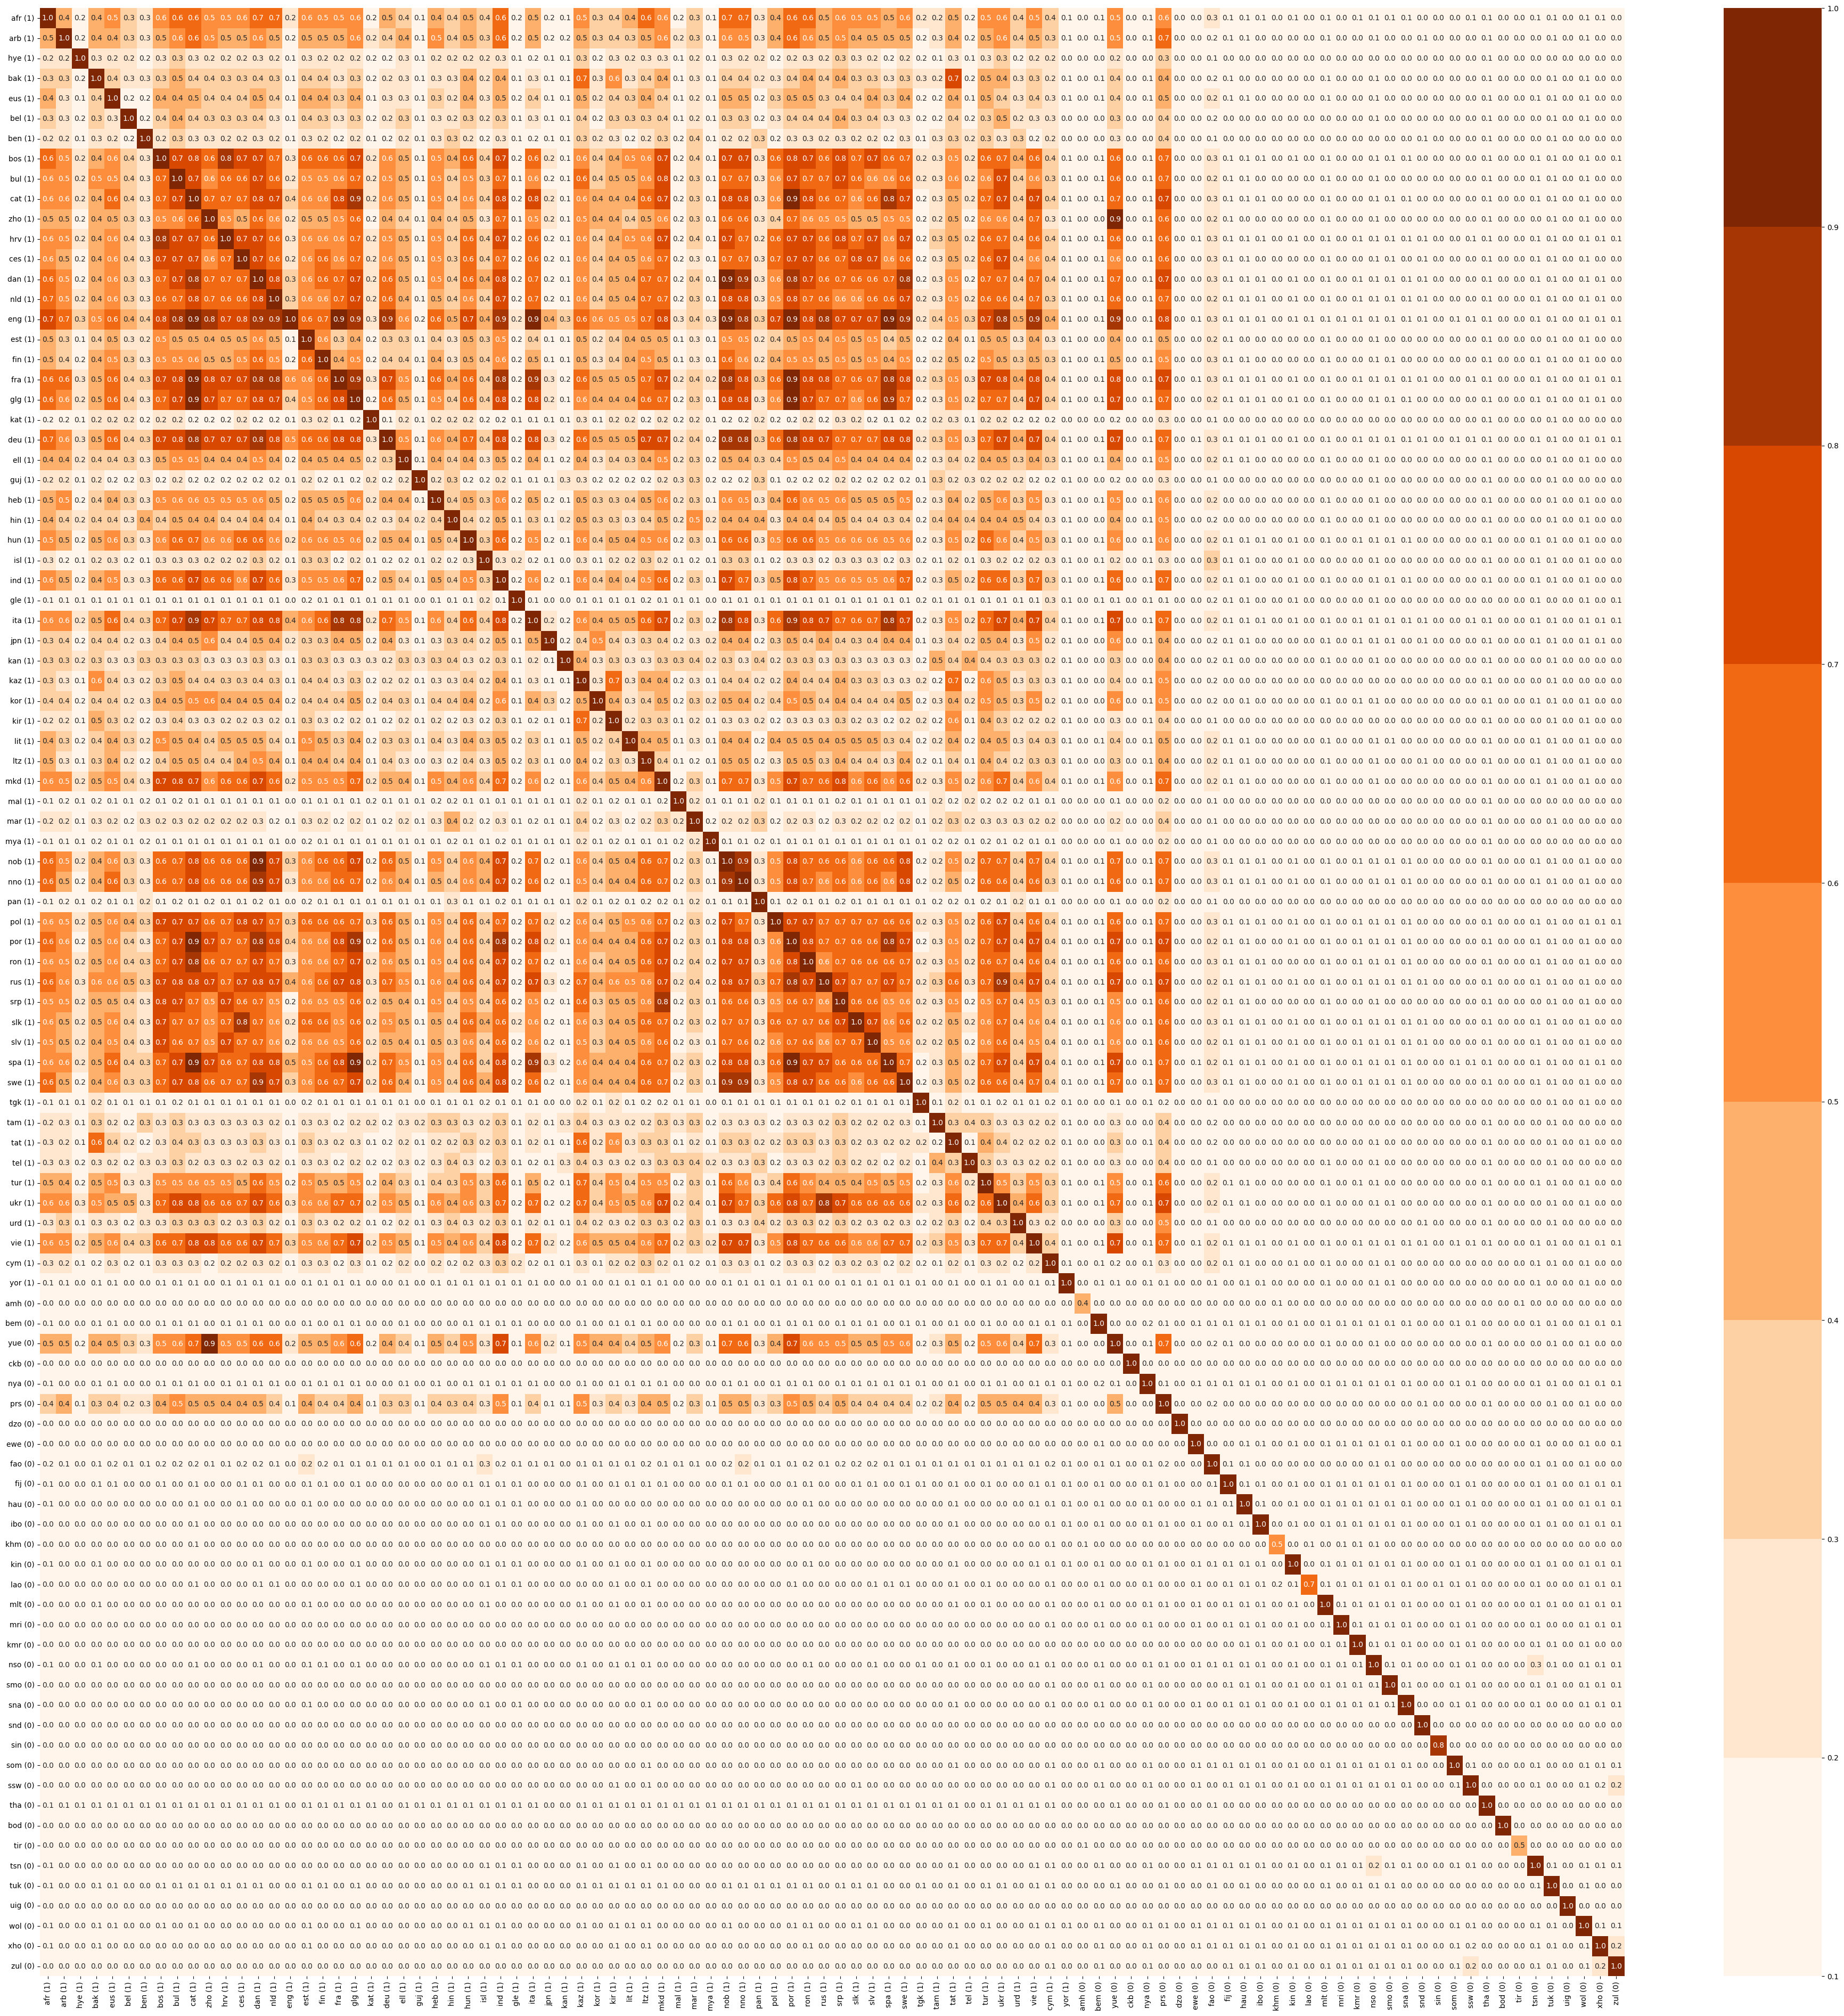

In [822]:
__df = flores_retrieval_results.set_index([
    "model", "lang1", "lang2"
]).mrr.unstack().loc['mbert_cls']

__df.index = [f"{l} ({int(lang_to_human_readable_language[l] in mbert_langs)})" for l in ordered_language_codes]
__df.columns = [f"{l} ({int(lang_to_human_readable_language[l] in mbert_langs)})" for l in ordered_language_codes]


bounds = np.arange(1, 11)/10
norm = BoundaryNorm(boundaries=bounds, ncolors=256)

heatmap_fig, heatmap_ax = plt.subplots(figsize=(48, 48))
sns.heatmap(__df, ax=heatmap_ax, annot=True, fmt=".1f", norm=norm,cmap='Oranges')

<Axes: >

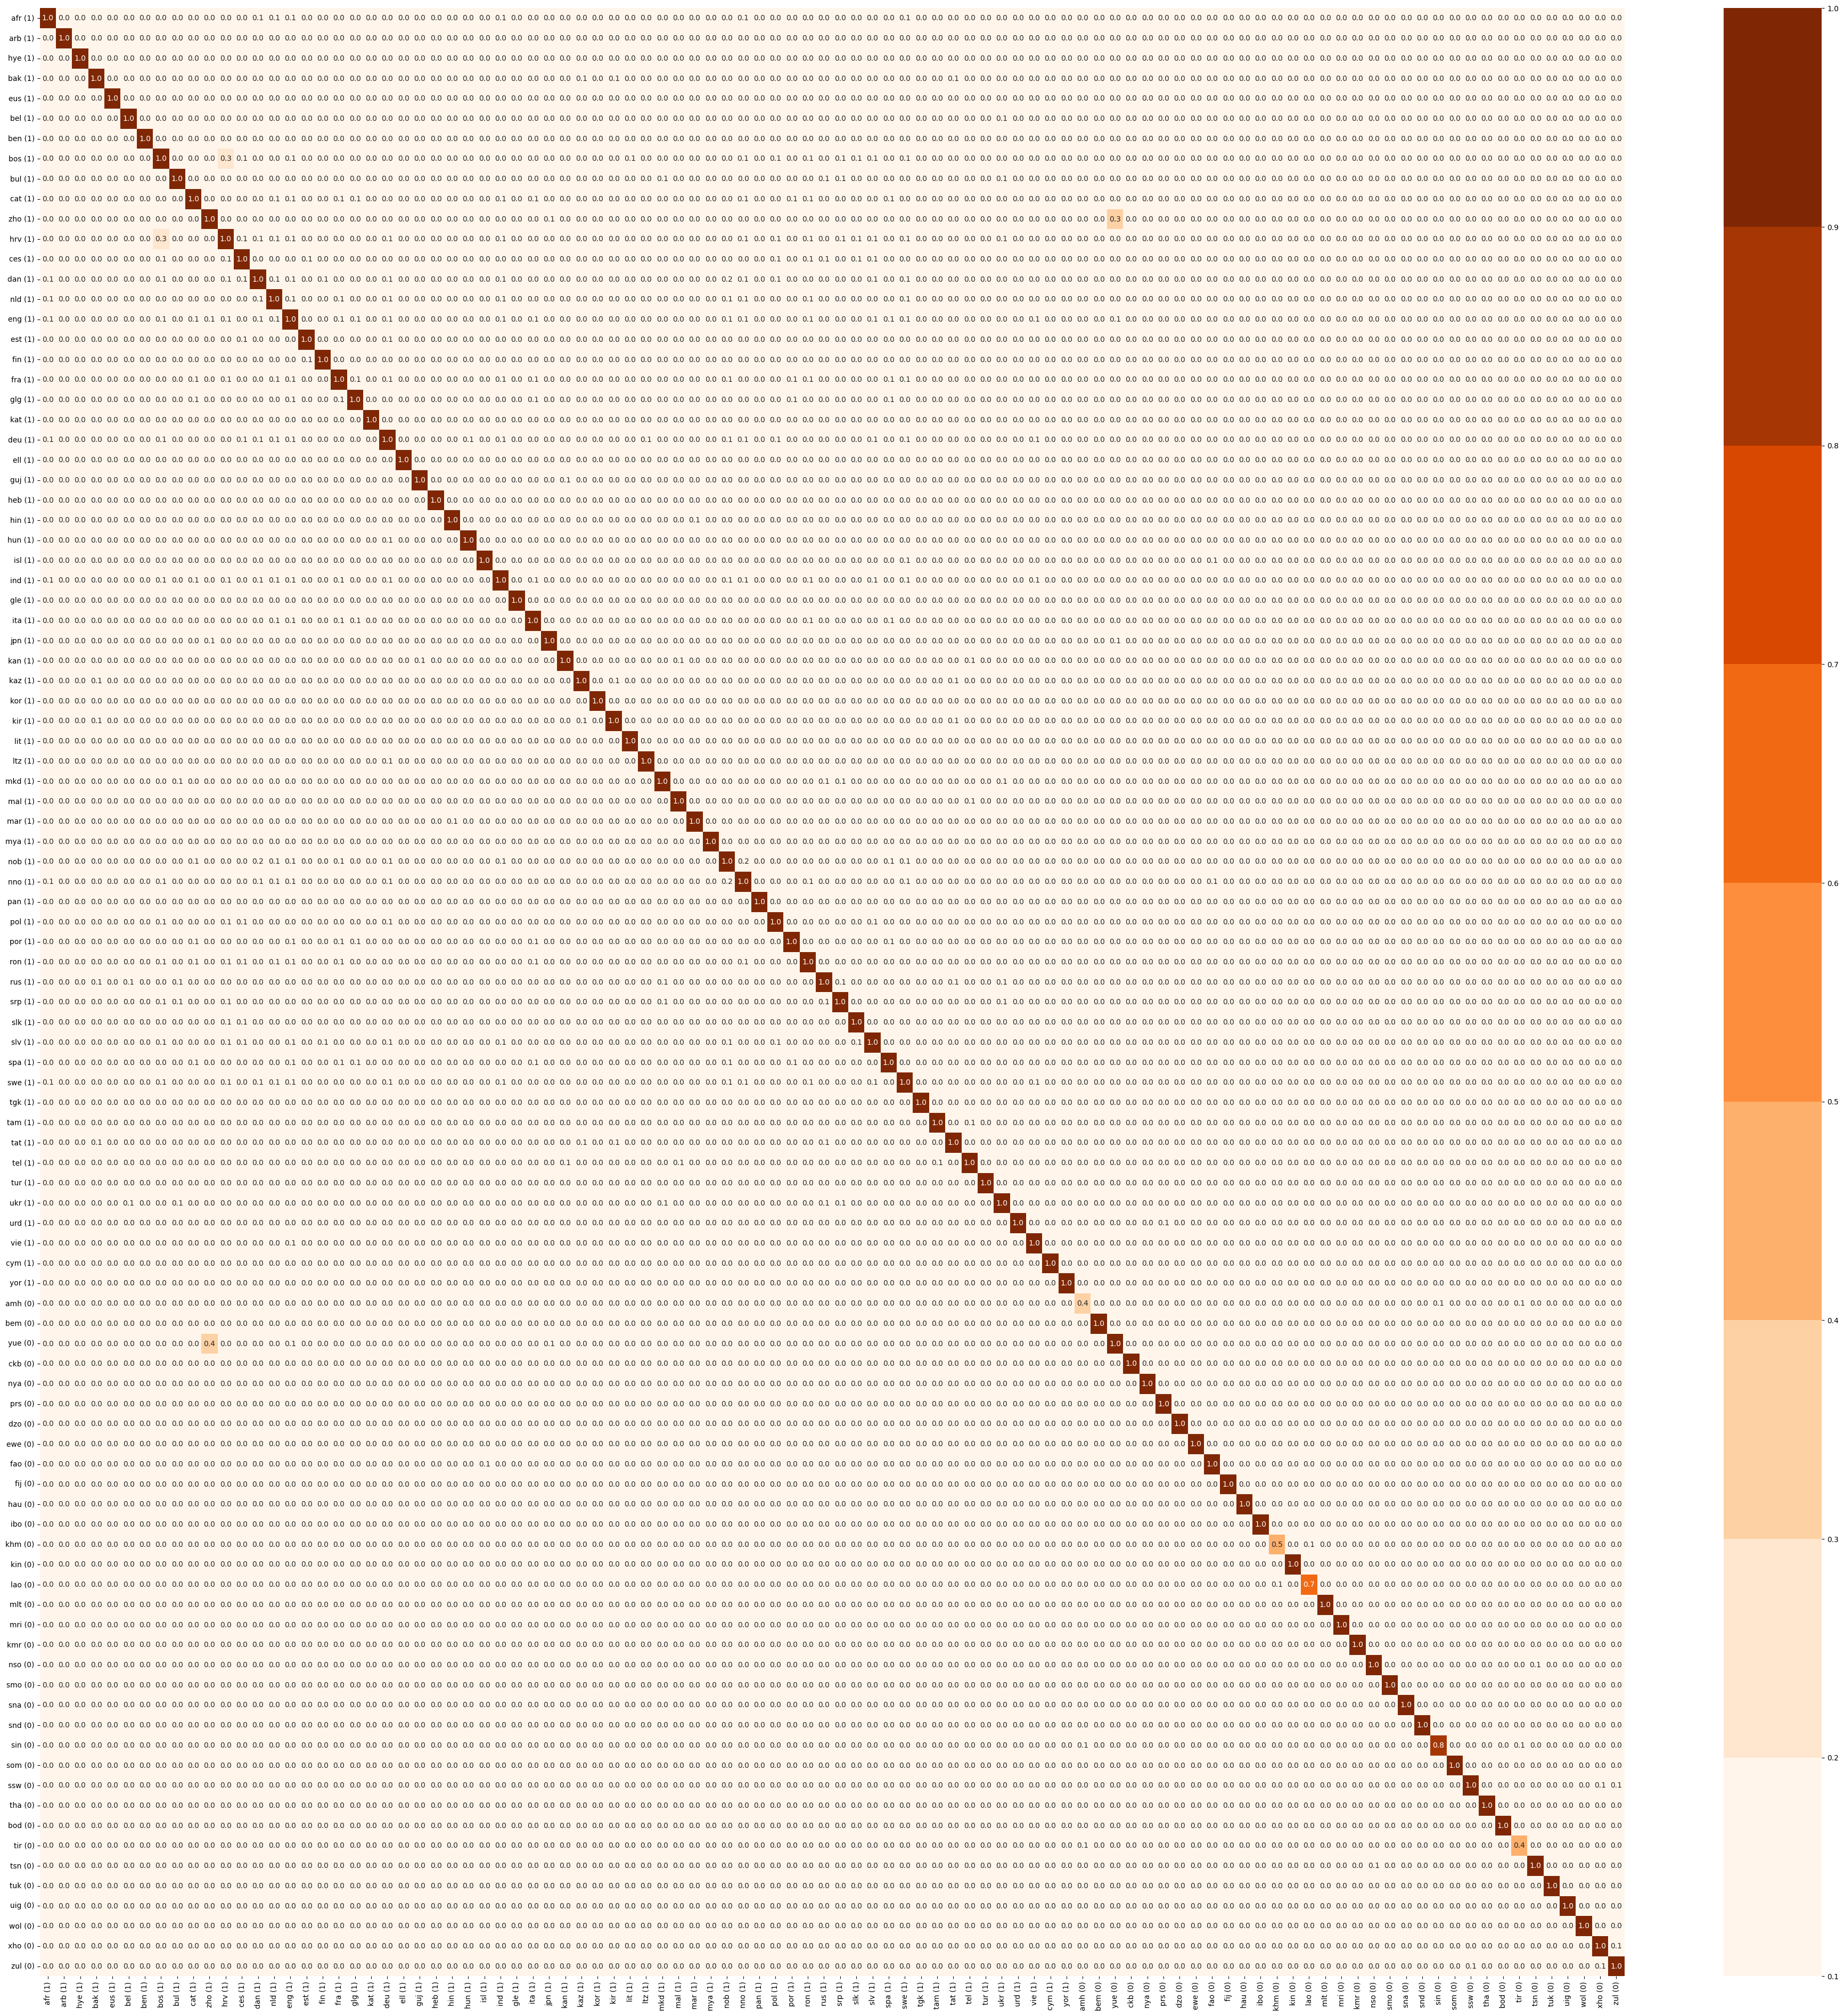

In [823]:
__df = flores_retrieval_results.set_index([
    "model", "lang1", "lang2"
]).mrr.unstack().loc['mbert_stsb']

__df.index = [f"{l} ({int(lang_to_human_readable_language[l] in mbert_langs)})" for l in ordered_language_codes]
__df.columns = [f"{l} ({int(lang_to_human_readable_language[l] in mbert_langs)})" for l in ordered_language_codes]


bounds = np.arange(1, 11)/10
norm = BoundaryNorm(boundaries=bounds, ncolors=256)

heatmap_fig, heatmap_ax = plt.subplots(figsize=(48, 48))
sns.heatmap(__df, ax=heatmap_ax, annot=True, fmt=".1f", norm=norm,cmap='Oranges')

<Axes: >

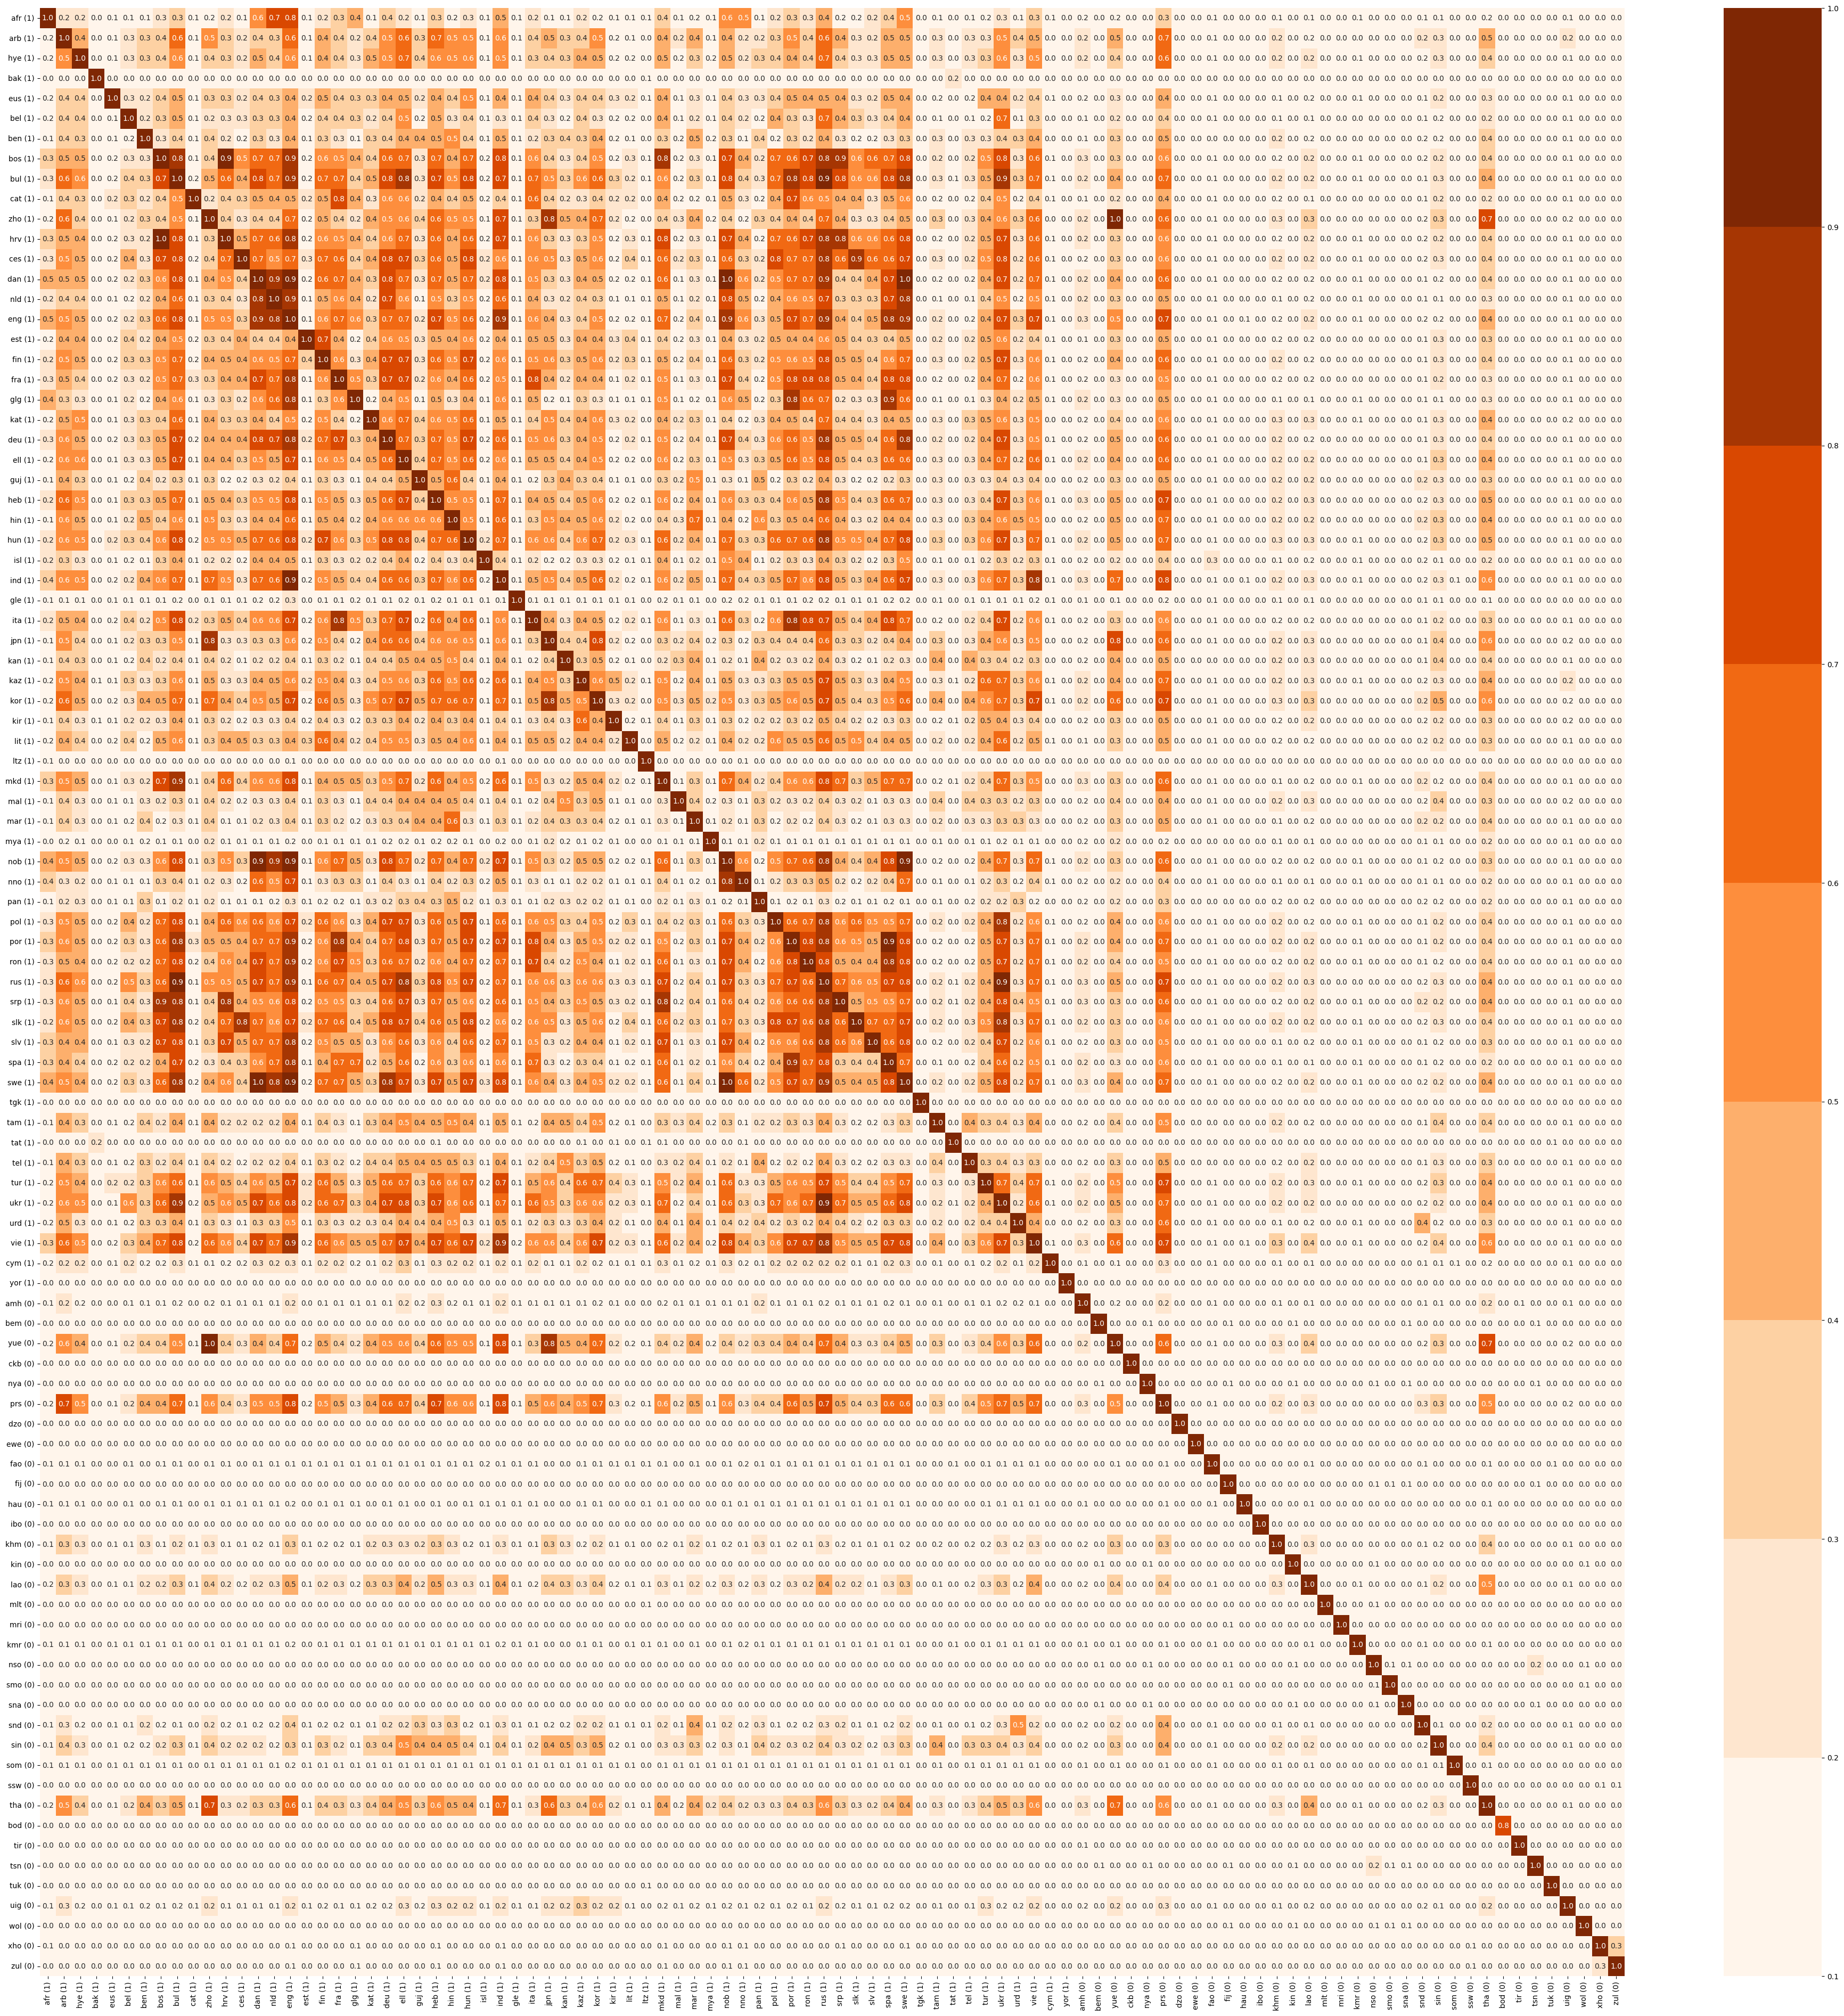

In [827]:
__df = flores_retrieval_results.set_index([
    "model", "lang1", "lang2"
]).mrr.unstack().loc['xlmr']

__df.index = [f"{l} ({int(lang_to_human_readable_language[l] in mbert_langs)})" for l in ordered_language_codes]
__df.columns = [f"{l} ({int(lang_to_human_readable_language[l] in mbert_langs)})" for l in ordered_language_codes]

bounds = np.arange(1, 11)/10
norm = BoundaryNorm(boundaries=bounds, ncolors=256)

heatmap_fig, heatmap_ax = plt.subplots(figsize=(48, 48))
sns.heatmap(__df, ax=heatmap_ax, annot=True, fmt=".1f", norm=norm,cmap='Oranges')

<Axes: >

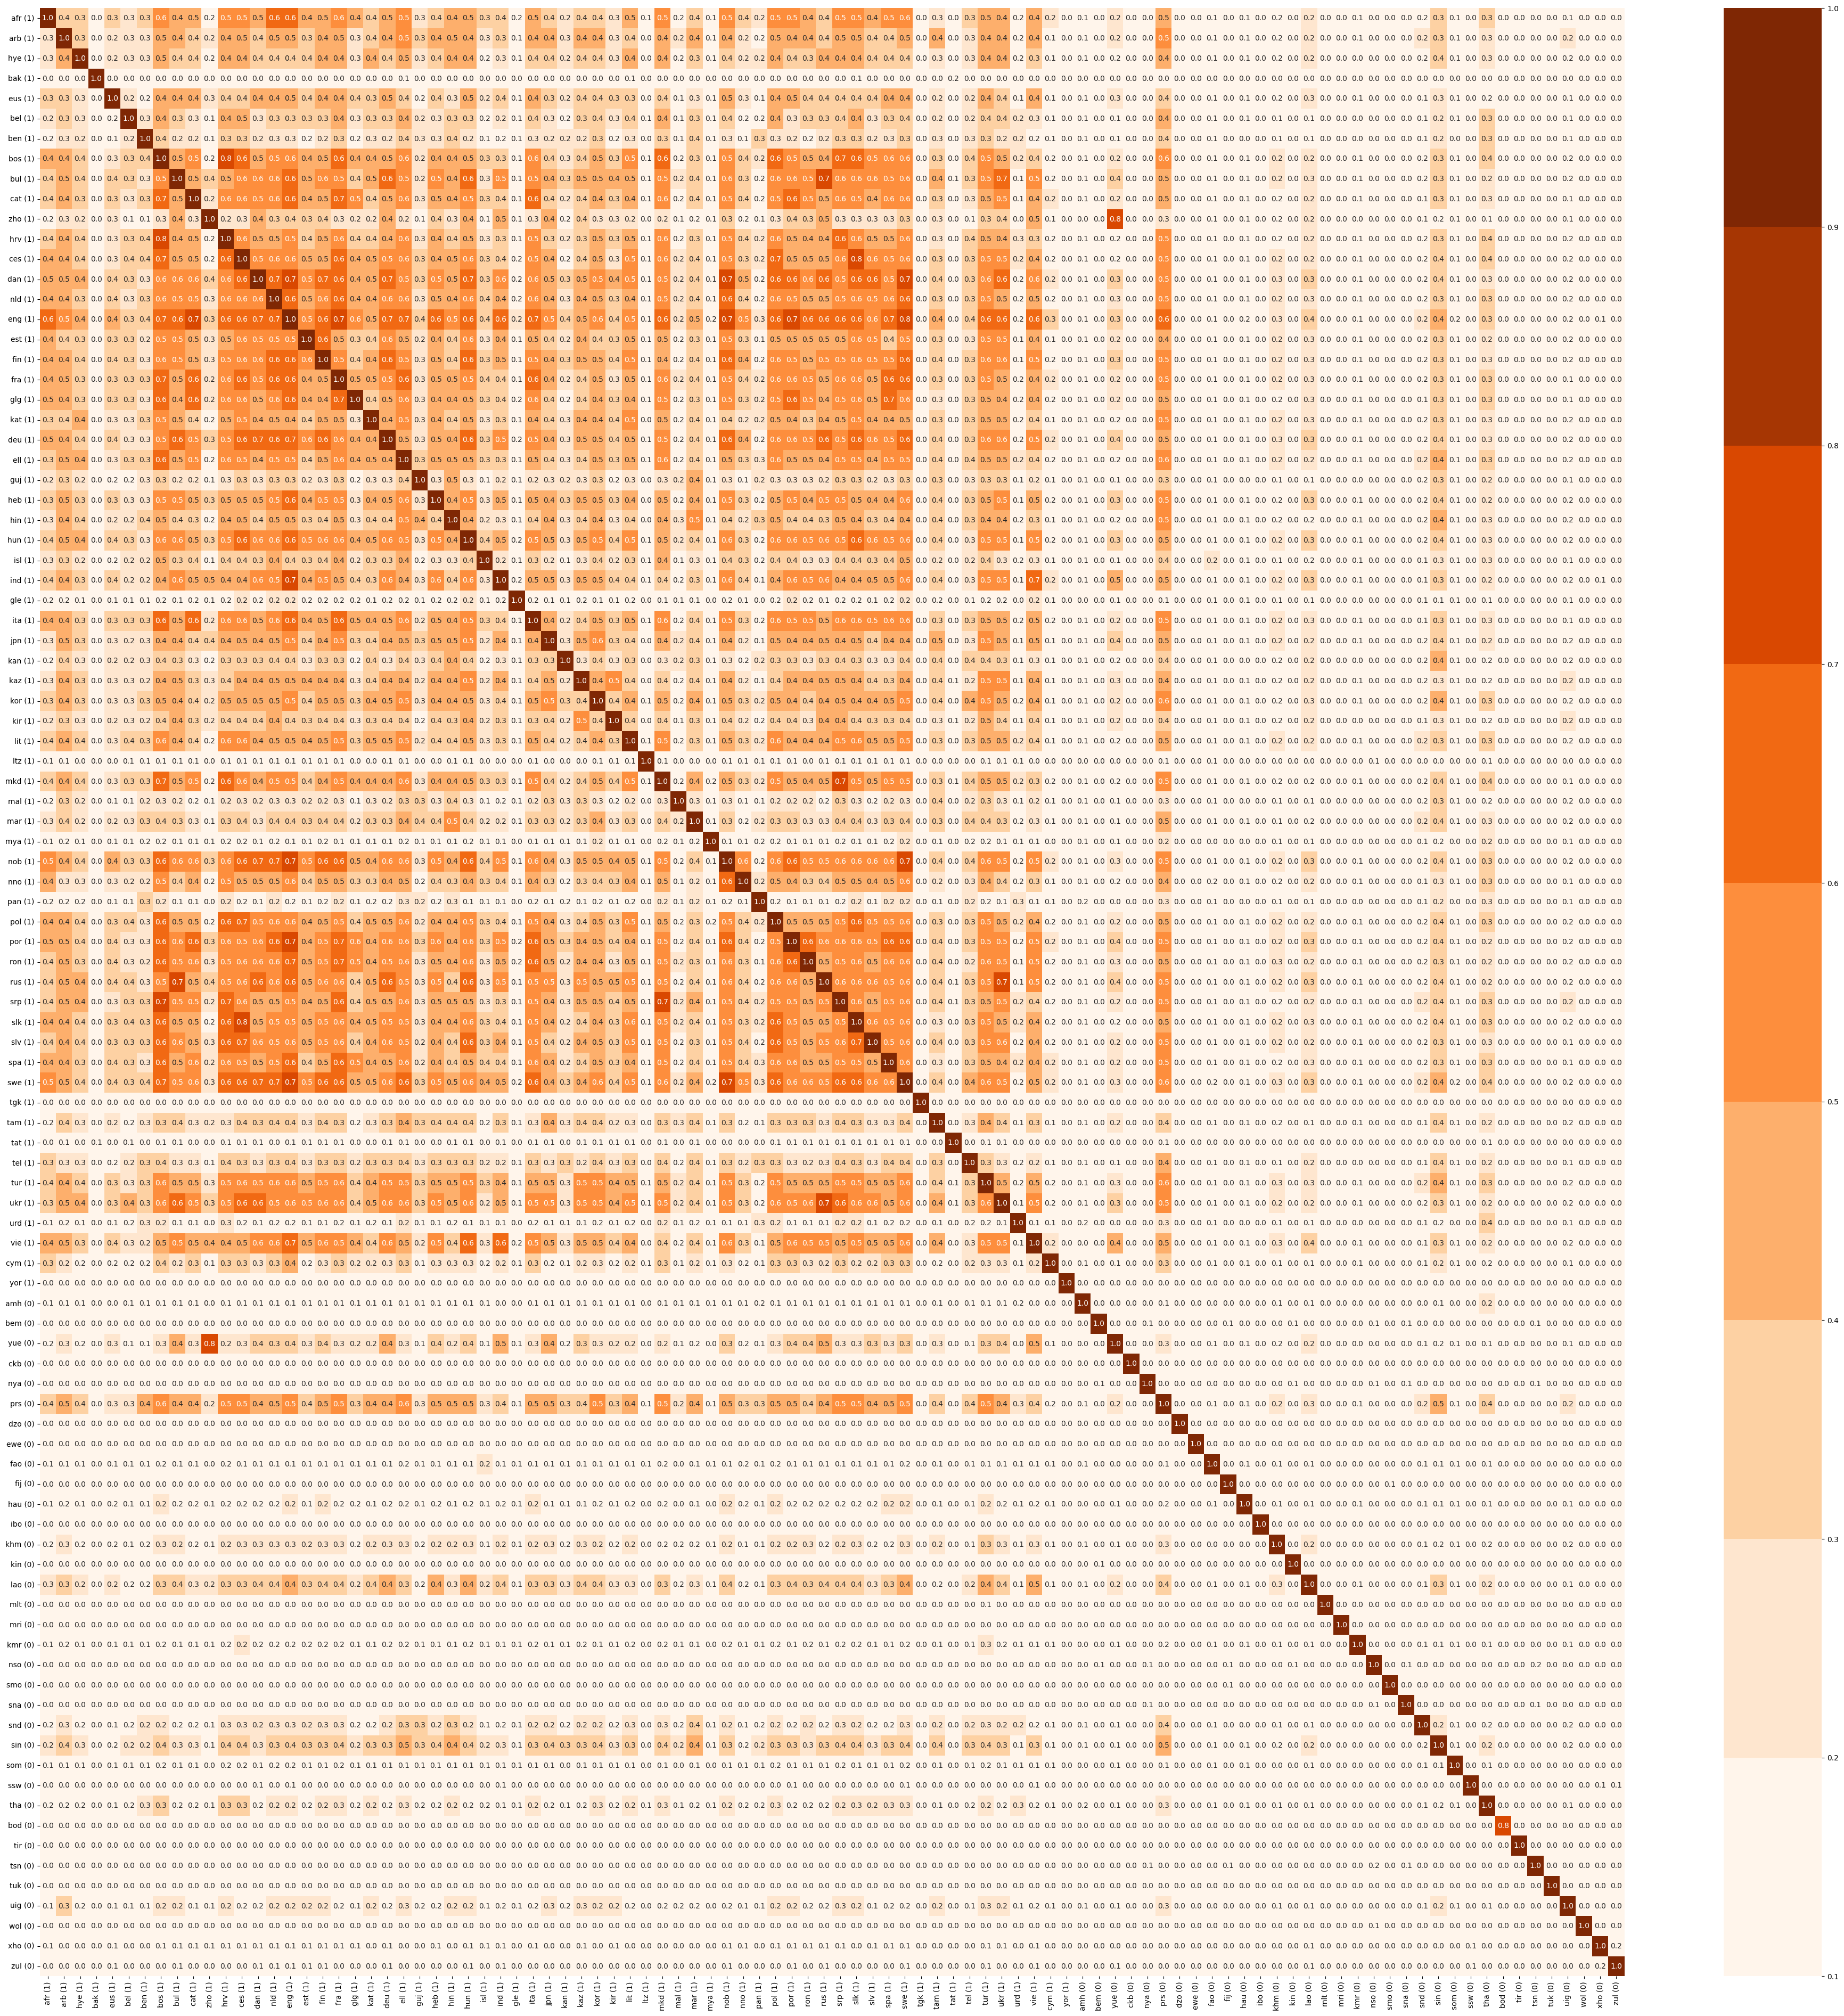

In [825]:
__df = flores_retrieval_results.set_index([
    "model", "lang1", "lang2"
]).mrr.unstack().loc['xlmr_cls']

__df.index = [f"{l} ({int(lang_to_human_readable_language[l] in mbert_langs)})" for l in ordered_language_codes]
__df.columns = [f"{l} ({int(lang_to_human_readable_language[l] in mbert_langs)})" for l in ordered_language_codes]

bounds = np.arange(1, 11)/10
norm = BoundaryNorm(boundaries=bounds, ncolors=256)

heatmap_fig, heatmap_ax = plt.subplots(figsize=(48, 48))
sns.heatmap(__df, ax=heatmap_ax, annot=True, fmt=".1f", norm=norm,cmap='Oranges')

<Axes: >

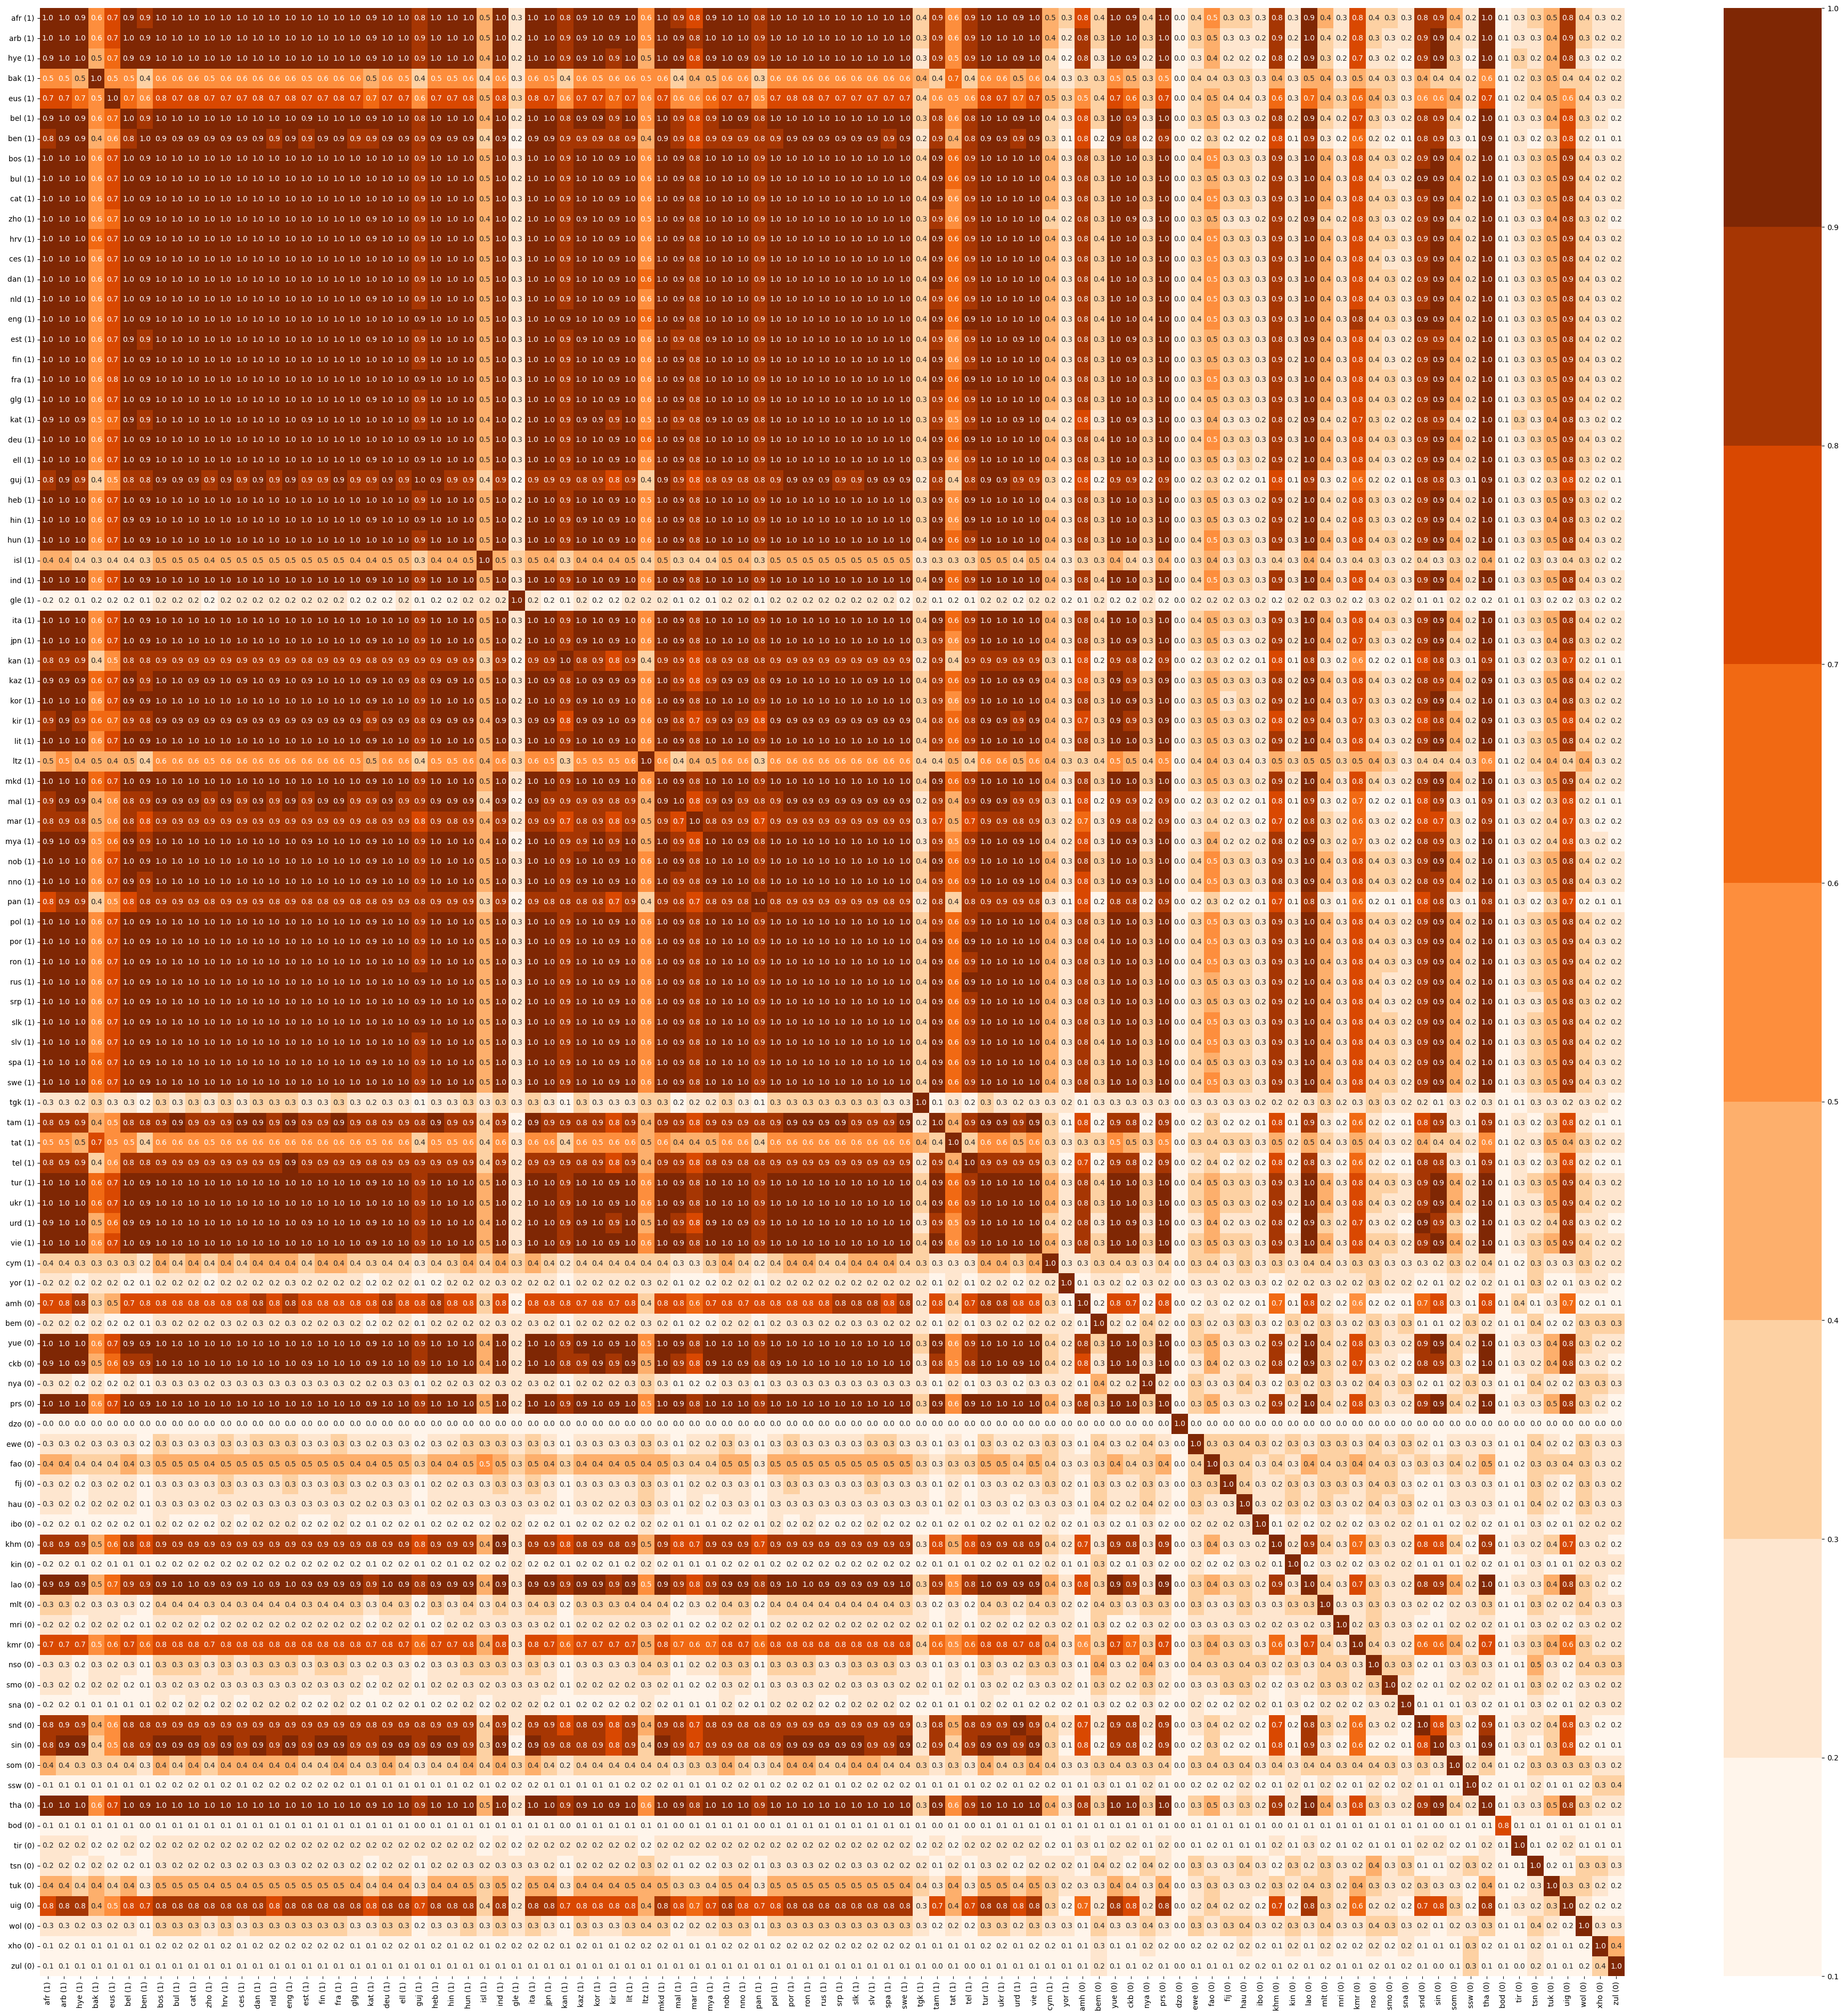

In [826]:
__df = flores_retrieval_results.set_index([
    "model", "lang1", "lang2"
]).mrr.unstack().loc['xlmr_stsb']

__df.index = [f"{l} ({int(lang_to_human_readable_language[l] in mbert_langs)})" for l in __df.index]
__df.columns = [f"{l} ({int(lang_to_human_readable_language[l] in mbert_langs)})" for l in __df.columns]

bounds = np.arange(1, 11)/10
norm = BoundaryNorm(boundaries=bounds, ncolors=256)

heatmap_fig, heatmap_ax = plt.subplots(figsize=(48, 48))
sns.heatmap(__df, ax=heatmap_ax, annot=True, fmt=".1f", norm=norm,cmap='Oranges')

In [805]:
lang_to_human_readable_language['isl']

'Icelandic'

## nusax

In [814]:
nusax_langs

{'acehnese',
 'balinese',
 'banjarese',
 'buginese',
 'english',
 'indonesian',
 'javanese',
 'madurese',
 'minangkabau',
 'ngaju',
 'sundanese',
 'toba_batak'}

<Axes: >

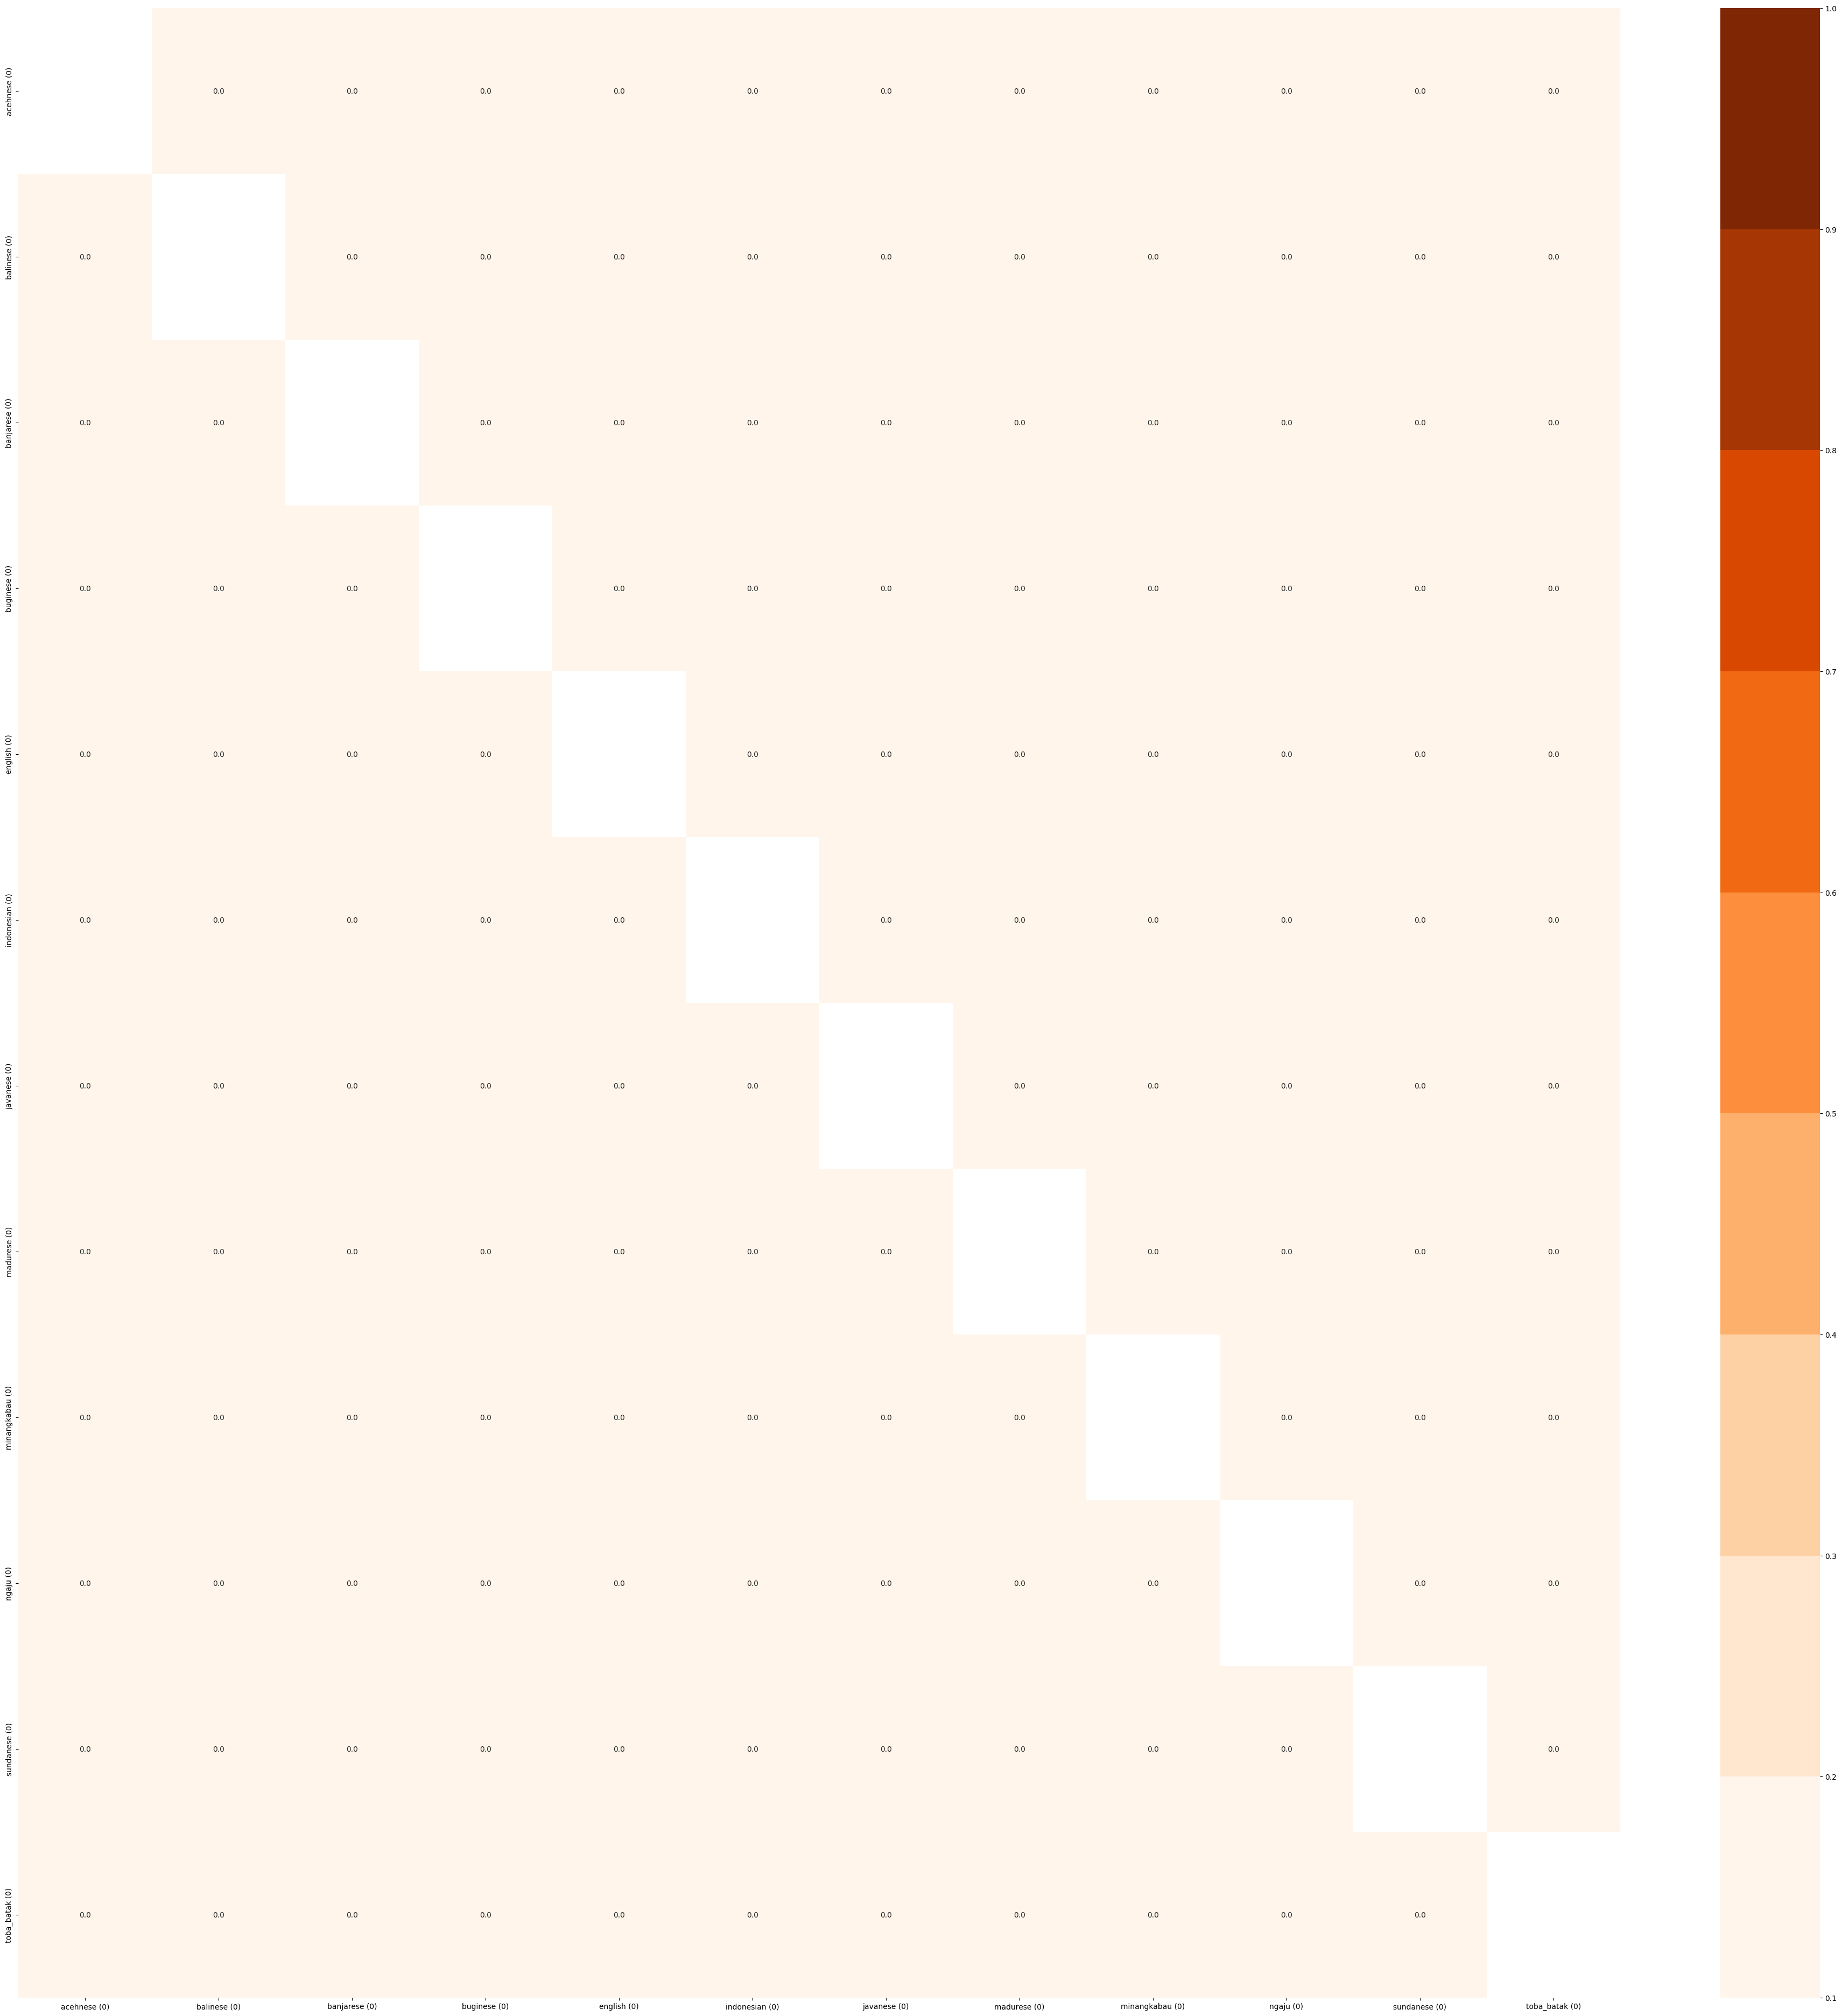

In [816]:
__df = nusax_retrieval_results.set_index([
    "model", "lang1", "lang2"
]).mrr.unstack().loc['mbert']

__df.index = [f"{l} ({int(lang_to_human_readable_language.get(l, l) in mbert_langs)})" for l in __df.index]
__df.columns = [f"{l} ({int(lang_to_human_readable_language.get(l, l) in mbert_langs)})" for l in __df.columns]

bounds = np.arange(1, 11)/10
norm = BoundaryNorm(boundaries=bounds, ncolors=256)

heatmap_fig, heatmap_ax = plt.subplots(figsize=(48, 48))
sns.heatmap(__df, ax=heatmap_ax, annot=True, fmt=".1f", norm=norm,cmap='Oranges')

In [733]:
# sns.catplot(data=flores_retrieval_results, x='lang1', y='avg_rank', hue='model', kind='point')

In [828]:
from tra

avg_rank    std_rank       mrr       lang1      lang2 dataset       model
6    493.3770  289.209011  0.010507    acehnese   balinese   nusax       mbert
7    504.1765  290.478895  0.007760    acehnese   balinese   nusax        xlmr
8    493.9205  291.632766  0.009586    acehnese   balinese   nusax   mbert_cls
9    507.3885  282.367857  0.007678    acehnese   balinese   nusax    xlmr_cls
10   494.0040  290.098897  0.007726    acehnese   balinese   nusax   xlmr_stsb
..        ...         ...       ...         ...        ...     ...         ...
853  496.9450  284.133370  0.006375  toba_batak  sundanese   nusax   xlmr_stsb
854  516.7205  286.658139  0.006508  toba_batak  sundanese   nusax    xlmr_cls
855  493.8210  292.742565  0.007909  toba_batak  sundanese   nusax  mbert_stsb
856  507.4780  287.163730  0.005952  toba_batak  sundanese   nusax        xlmr
857  496.5280  286.908142  0.006138  toba_batak  sundanese   nusax   mbert_cls

[792 rows x 7 columns]

# OLD

## lets load the featurized sentences

In [ ]:
# CORPUS_NAME='ntrex'
# heatmaps_fig, heatmaps_ax = plt.subplots(figsize=(48, 48), ncols=2, nrows=3)
# row_col_iterable = it.product(range(3), range(2))

# g_heat = (
#     results_dfs[CORPUS_NAME][results_dfs[CORPUS_NAME].model == model]
#         .set_index(['query_lang', 'corpus_lang'])
#         .mrr.unstack() 
#     for model in model_names
# )

# for model, (i, j) in zip(model_names, row_col_iterable):
#     df_heat = next(g_heat)    
#     sns.heatmap(df_heat, ax=heatmaps_ax[i][j], annot=True, vmin=0, vmax=.2)
#     heatmaps_ax[i][j].set_title(model)

In [269]:
import os
os.environ['TOKENIZERS_PARALLELISM'] = 'false'

In [271]:
import datasets as ds

In [296]:
from sklearn.metrics import pairwise_distances_chunked

In [297]:
import numpy as np
import pandas as pd

In [313]:
def mrr_experiment_lang_vs_lang2_pairwise(lang, lang2, embs, df):
    assert embs.shape[0] == df.shape[0]

    # Filter DataFrames by language only once and store them in a dictionary
    lang_dfs = {lang: df[df.language == lang].copy().reset_index(drop=True) for lang in (lang, lang2)}

    embs_lang = embs[lang_dfs[lang].global_sentence_id]
    embs_lang2 = embs[lang_dfs[lang2].global_sentence_id]

    # Use pairwise_distances_chunked to compute pairwise distances in smaller chunks
    distances_iter = pairwise_distances_chunked(embs_lang, embs_lang2, metric="cosine")

    mrr_sum = 0
    count = 0
    for distances_chunk in distances_iter:
        # Compute ranks using rankdata from scipy.stats
        ranks = rankdata(distances_chunk, axis=1) - 1

        sentence_ids = lang_dfs[lang].sentence_id.values
        target_indices = np.where(ranks == sentence_ids[:, np.newaxis])[1]
        mrr_sum += np.sum(1 / (target_indices + 1))
        count += len(target_indices)

    mrr = mrr_sum / count
    return mrr

In [314]:
def add_sentence_id(examples):
    examples['sentence_id'] = [idx for idx, _ in enumerate(examples['text'])]
    return examples

In [315]:
import pickle

In [316]:
# LOAD FLORES & NTREX
flores_separate_langs = ds.load_from_disk("../data-bin/flores-dev-no-orth/")
ntrex_separate_langs = ds.load_from_disk("../data-bin/ntrex-no-orth//")

flores_separate_langs = flores_separate_langs.map(add_sentence_id, batched=True, batch_size=10000)
ntrex_separate_langs = ntrex_separate_langs.map(add_sentence_id, batched=True, batch_size=10000)

flores = ds.concatenate_datasets([
    flores_separate_langs[lang] for lang in flores_separate_langs
])
ntrex = ds.concatenate_datasets([
    ntrex_separate_langs[lang] for lang in ntrex_separate_langs if lang in flores_separate_langs
])

# LOAD NUSAX
nusax_paths = {
    split: Path("../data/nusax_parallel_sentences") / f"{split}.csv"
    for split in ["train", "valid", "test"]
}
nusax_dataset_dict = ds.DatasetDict()
for split, p in nusax_paths.items():
    _split = {"dev": "valid"}.get(split, split)    
    _ds = ds.Dataset.from_csv(str(p)).remove_columns('Unnamed: 0')
    nusax_dataset_dict[_split] = _ds

nusax = ds.concatenate_datasets([nusax_dataset_dict[split] for split in nusax_dataset_dict])
nusax_df = nusax.to_pandas()
nusax_df.columns.name = "language"
nusax_sentences = nusax_df.stack()
nusax_sentences.index.names = ['sentence_id', 'language']
nusax_sentences.name = 'text' 
nusax_df = nusax_sentences.reset_index().sample(frac=1) # randomize order
nusax = ds.Dataset.from_pandas(nusax_df, preserve_index=False)

# Combine datasets
all_datasets = {"flores": flores, "nusax": nusax, "ntrex": ntrex}
all_dataset_dfs = {
    key: val.to_pandas() for key, val in all_datasets.items()
}
for dataset_name, df in all_dataset_dfs.items():
    df['global_sentence_id'] = df.index.tolist()

print("ranking")

# DO ACTUAL RANKING
model_names = { "mbert", "xlmr", "mbert_cls", "xlmr_cls", "mbert_stsb", "xlmr_stsb" }

# load pickle file
with open('../data/retrieval_featurized_sentences_flores_nusax_ntrex.pkl', 'rb') as f:
    featurized_sentences = pickle.load(f)

Loading cached processed dataset at /home/jonne/ling-inf-transfer/data-bin/flores-dev-no-orth/arz/cache-43115bc207b20d5c.arrow
Loading cached processed dataset at /home/jonne/ling-inf-transfer/data-bin/flores-dev-no-orth/aeb/cache-982337e36dafebae.arrow
Loading cached processed dataset at /home/jonne/ling-inf-transfer/data-bin/flores-dev-no-orth/cat/cache-4a3feff7fa0a245e.arrow
Loading cached processed dataset at /home/jonne/ling-inf-transfer/data-bin/flores-dev-no-orth/gla/cache-89b272c387eb6ccc.arrow
Loading cached processed dataset at /home/jonne/ling-inf-transfer/data-bin/flores-dev-no-orth/snd/cache-24ae51fa8ad28e53.arrow
Loading cached processed dataset at /home/jonne/ling-inf-transfer/data-bin/flores-dev-no-orth/taq/cache-481a447eba018252.arrow
Loading cached processed dataset at /home/jonne/ling-inf-transfer/data-bin/flores-dev-no-orth/ell/cache-fc1703be8c1296cf.arrow
Loading cached processed dataset at /home/jonne/ling-inf-transfer/data-bin/flores-dev-no-orth/jav/cache-954480b

Loading cached processed dataset at /home/jonne/ling-inf-transfer/data-bin/flores-dev-no-orth/mya/cache-28f29165a13521e9.arrow
Loading cached processed dataset at /home/jonne/ling-inf-transfer/data-bin/flores-dev-no-orth/tum/cache-3bc25c511e3795a0.arrow
Loading cached processed dataset at /home/jonne/ling-inf-transfer/data-bin/flores-dev-no-orth/ilo/cache-71c776a6fa9488de.arrow
Loading cached processed dataset at /home/jonne/ling-inf-transfer/data-bin/flores-dev-no-orth/slk/cache-50eaa13965a7b950.arrow
Loading cached processed dataset at /home/jonne/ling-inf-transfer/data-bin/flores-dev-no-orth/por/cache-d94eb791a3b7df98.arrow
Loading cached processed dataset at /home/jonne/ling-inf-transfer/data-bin/flores-dev-no-orth/crh/cache-0aa08016ea30ba7a.arrow
Loading cached processed dataset at /home/jonne/ling-inf-transfer/data-bin/flores-dev-no-orth/srp/cache-ae20c7c1bc5964ae.arrow
Loading cached processed dataset at /home/jonne/ling-inf-transfer/data-bin/flores-dev-no-orth/lus/cache-6c2bd61

Loading cached processed dataset at /home/jonne/ling-inf-transfer/data-bin/flores-dev-no-orth/deu/cache-68075a1f03ba5b3f.arrow
Loading cached processed dataset at /home/jonne/ling-inf-transfer/data-bin/flores-dev-no-orth/ben/cache-4b73271a95c815b3.arrow
Loading cached processed dataset at /home/jonne/ling-inf-transfer/data-bin/flores-dev-no-orth/yue/cache-acb32104d3909785.arrow
Loading cached processed dataset at /home/jonne/ling-inf-transfer/data-bin/flores-dev-no-orth/jpn/cache-223640baf3fde7c2.arrow
Loading cached processed dataset at /home/jonne/ling-inf-transfer/data-bin/flores-dev-no-orth/rus/cache-b1a6079ae63ad0f1.arrow
Loading cached processed dataset at /home/jonne/ling-inf-transfer/data-bin/flores-dev-no-orth/hau/cache-6d9de6c8e3433133.arrow
Loading cached processed dataset at /home/jonne/ling-inf-transfer/data-bin/flores-dev-no-orth/lmo/cache-6d6a879d52dba4fc.arrow
Loading cached processed dataset at /home/jonne/ling-inf-transfer/data-bin/flores-dev-no-orth/zsm/cache-c68b6f8

Loading cached processed dataset at /home/jonne/ling-inf-transfer/data-bin/flores-dev-no-orth/acm/cache-a4a6e72b9e32e2d3.arrow
Loading cached processed dataset at /home/jonne/ling-inf-transfer/data-bin/ntrex-no-orth/hun/cache-808af18109c223af.arrow
Loading cached processed dataset at /home/jonne/ling-inf-transfer/data-bin/ntrex-no-orth/tah/cache-7cb227b7c28d2816.arrow
Loading cached processed dataset at /home/jonne/ling-inf-transfer/data-bin/ntrex-no-orth/div/cache-a8ad24f4b8f0f1b3.arrow
Loading cached processed dataset at /home/jonne/ling-inf-transfer/data-bin/ntrex-no-orth/ssw/cache-003861495469e329.arrow
Loading cached processed dataset at /home/jonne/ling-inf-transfer/data-bin/ntrex-no-orth/est/cache-e374aa4c3efb6895.arrow
Loading cached processed dataset at /home/jonne/ling-inf-transfer/data-bin/ntrex-no-orth/fuc/cache-a9b1197737bf6974.arrow
Loading cached processed dataset at /home/jonne/ling-inf-transfer/data-bin/ntrex-no-orth/slk/cache-52041a20b5fe1a6e.arrow
Loading cached proc

Loading cached processed dataset at /home/jonne/ling-inf-transfer/data-bin/ntrex-no-orth/snd/cache-f4854e56bf574668.arrow
Loading cached processed dataset at /home/jonne/ling-inf-transfer/data-bin/ntrex-no-orth/hin/cache-3c8bbc7045322b6d.arrow
Loading cached processed dataset at /home/jonne/ling-inf-transfer/data-bin/ntrex-no-orth/slv/cache-6e2dd08a0ec547ee.arrow
Loading cached processed dataset at /home/jonne/ling-inf-transfer/data-bin/ntrex-no-orth/hrv/cache-0123598a794eb874.arrow
Loading cached processed dataset at /home/jonne/ling-inf-transfer/data-bin/ntrex-no-orth/ltz/cache-4ead0f6baaec9ab0.arrow
Loading cached processed dataset at /home/jonne/ling-inf-transfer/data-bin/ntrex-no-orth/shi/cache-d2e038fb5338c814.arrow
Loading cached processed dataset at /home/jonne/ling-inf-transfer/data-bin/ntrex-no-orth/arb/cache-8f7d919f31d84794.arrow
Loading cached processed dataset at /home/jonne/ling-inf-transfer/data-bin/ntrex-no-orth/tat/cache-18e6a802ac1c9de6.arrow
Loading cached processed

ranking


In [317]:
dataset_to_use = 'flores'
lang1 = 'fin'
lang2 = 'est'

In [318]:
import itertools as it

In [319]:
featurized_sentences.keys()

dict_keys(['flores', 'nusax', 'ntrex'])

In [320]:
X_flores_sentences = featurized_sentences['flores']['xlmr']

In [321]:
flores_ntrex_langs = list(set(all_dataset_dfs['flores'].language) & set(all_dataset_dfs['ntrex'].language))

In [322]:
def get_mrrs_for_language(lang, embs, df, uniq_langs):
    return pd.Series([
        mrr_experiment_lang_vs_lang2_pairwise(
            lang, lg, embs, df
        ) 
        for lg in tqdm(uniq_langs)
    ])

In [323]:
from tqdm import tqdm

In [324]:
rows_mrr_experiment_analysis_pairwise = []
for model_name, dataset_name in it.product(model_names, [dataset_to_use]):
    embeddings = featurized_sentences[dataset_name][model_name]
    df = all_dataset_dfs[dataset_name]
    mrrs = get_mrrs_for_language(lang1, embeddings, df, flores_ntrex_langs)
    break

#     mrr = mrr_experiment_lang_vs_lang2_pairwise( lang1, lang2, embeddings, df)
#     rows_mrr_experiment_analysis_pairwise.append(
#         (dataset_name, model_name, lang1, lang2, mrr)
#     )

mrr_results = pd.DataFrame(rows_mrr_experiment_analysis_pairwise, columns=["dataset", "model", "query_lang", "corpus_lang", "mrr"])



  0%|                                                                                      | 0/98 [00:00<?, ?it/s]

  1%|▊                                                                             | 1/98 [00:00<00:12,  7.89it/s]

  2%|█▌                                                                            | 2/98 [00:00<00:11,  8.00it/s]

  3%|██▍                                                                           | 3/98 [00:00<00:11,  8.00it/s]

  4%|███▏                                                                          | 4/98 [00:00<00:11,  7.99it/s]

  5%|███▉                                                                          | 5/98 [00:00<00:11,  7.99it/s]

  6%|████▊                                                                         | 6/98 [00:00<00:11,  7.98it/s]

  7%|█████▌                                                                        | 7/98 [00:00<00:11,  7.98it/s]

  8%|██████▎                                                          

<Axes: >

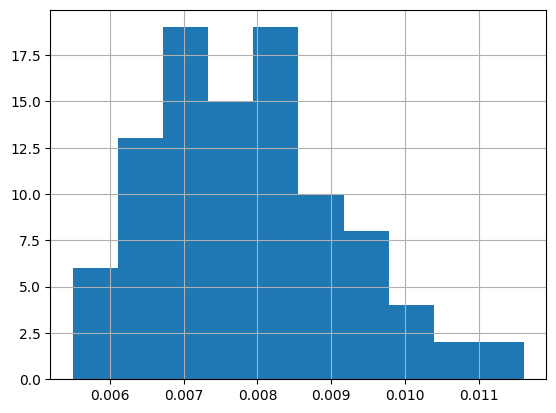

In [328]:
mrrs.hist()